# CIAO Workshop Exercises



# Introduction

These exercises are designed to familiarize students with Chandra data and some of the basics of X-ray data analysis using CIAO with Chandra data.

Students will use a variety of tools and scripts to perform typical Chandra data analysis tasks.  These exercises are not intended to be a Cookbook for all Chandra data analysis, but rather are meant to expose students to basic X-ray analysis techniques.

Students should already have CIAO installed on their systems.  The exercises here have been developed with CIAO 4.10, using the CIAO-4.10.2 contributed scripts package, with Chandra CALDB 4.7.9.  These exercises can be performed with either the Python 2 or the Python 3 editions of CIAO.  Students should also have MARX installed.  These exercises have been developed using MARX 5.3.3.  The install_marx script in CIAO can be used to automate the installation process.


## Getting to know Chandra data

In this section students will obtain Chandra data and learn some techniques to inspect the quality of the data and how to reprocess their dataset.


### Download Dataset

#### Exercise 1

Obtain the standard data distribution for Chandra OBS_ID 13858.

> Q: How did you obtain the data (Chaser, download_chandra_obsid, FTP)?

In [1]:
/bin/rm -rf 13858
download_chandra_obsid 13858


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  readme   ascii      11 Kb  ####################          < 1 s  365.2 kb/s
  oif      fits       23 Kb  ####################          < 1 s  1410.4 kb/s
  vv       pdf        35 Kb  ####################          < 1 s  2072.7 kb/s
  cntr_img fits       77 Kb  ####################          < 1 s  5092.1 kb/s
  cntr_img jpg       371 Kb  ####################          < 1 s  14588.8 kb/s
  evt2     fits        5 Mb  ####################          < 1 s  19411.8 kb/s
  full_img fits       52 Kb  ####################          < 1 s  5148.1 kb/s
  full_img jpg        42 Kb  ####################          < 1 s  4336.5 kb/s
  bpix     fits       11 Kb  ####################          < 1 s  293.4 kb/s
  fov      fits        6 Kb  ####################          < 1 s  409.6 kb/s
  eph1     fits      308 Kb  ####################          < 1 s

Students may want to uncompress, gunzip, all of the files in the top-level directory, along with the primary and secondary directories at this point.

In [2]:
gunzip 13858/primary/*gz
gunzip 13858/secondary/*gz

In [3]:
download_obsid_caldb 13858 ./CALDB

download_obsid_caldb
          infile = 13858
          outdir = ./CALDB
      background = no
         missing = no
         clobber = no
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.7.9
Retrieving CALDB index files
Processing infile=13858/primary/acisf13858N001_evt2.fits
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23aimptsN0002.fits          ####################
    telD1999-07-23tdetN0001.fits            ####################
    telD1999-07-23geomN0006.fits            ####################
    telD1999-07-23skyN0002.fits             ####################
    telD1999-07-23sgeomN0001.fits           ####################
    hrmaD1996-12-20axeffaN0008.fits         ####################
    acisD1997-04-17qeN0006.fits             ####################
    acisD1999-08-13contamN0011.fits         ####################
    acisD2000-11-28badpixN0003.fits         ####################
    acisD2010-

In [4]:
export CALDB=`pwd`/CALDB
export CALDBCONFIG=`pwd`/CALDB/software/tools/caldb.config
export CALDBALIS=none

### Review V&V Report

#### Exercise 2

Read the Chandra Verification and Validation report in the top level directory of the data distribution: axaff13858N001_VV001_vv2.pdf


In [5]:
acroread 13858/axaff13858N001_VV001_vv2.pdf 2>&1 /dev/null &

[1] 19959


> Q: Summarize the V&V comments: **Joint Proposal: NRAO**

> Q: What is the target of this observation? **SDSS J091449.05+085321.1**

> Q: What is the sequence number SEQ_NUM of this observation? **702584**



In [6]:
echo


(acroread:19959): Gtk-WARNING **: /usr/lib64/gtk-2.0/2.10.0/engines/libcrux-engine.so: wrong ELF class: ELFCLASS64

(acroread:19959): Gtk-WARNING **: /usr/lib64/gtk-2.0/2.10.0/engines/libcrux-engine.so: wrong ELF class: ELFCLASS64
Gtk-Message: Failed to load module "canberra-gtk-module"

(acroread:19959): Pango-WARNING **: /export/ciao-4.10/ots/lib/pango/1.6.0/modules/pango-basic-fc.so: wrong ELF class: ELFCLASS64

[1]+  Done                    acroread 13858/axaff13858N001_VV001_vv2.pdf /dev/null 2>&1


### Display data in ds9

Locate the event files.  There are two event files included in the standard data distribution.  The Level 1 event file, evt1, is in the secondary/ directory, the Level 2 event file, evt2,  is in the primary/ directory.

In [7]:
/bin/ls -1 13858/*/*evt*.fits

13858/primary/acisf13858N001_evt2.fits
13858/secondary/acisf13858_000N001_evt1.fits


#### Exercise 3

Display the Level 2 event file using ds9.  Make sure to use Log scale.

In [8]:
ds9 13858/primary/acisf13858N001_evt2.fits -scale log &

[1] 20386


> Q:  Using the cursor, record the coordinate of the bright source in the center of the image: 

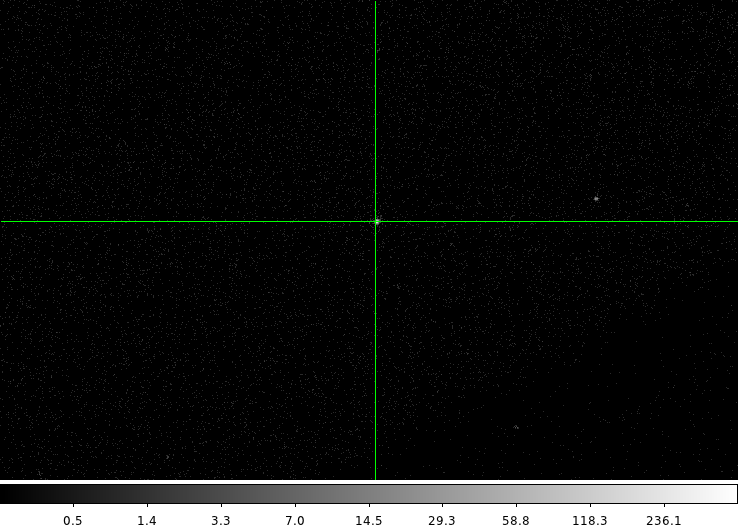

In [9]:
xpaset -p ds9 crosshair 4103.5 4115.5 phyiscal
xpaset -p ds9 saveimage png ds9_01.png 
display < ds9_01.png

In [10]:
xpaget ds9 crosshair wcs fk5 sexagesimal
xpaset -p ds9 mode region

9:14:49.1238 +8:53:20.987


#### Exercise 4

By default, ds9 only shows part of the Chandra dataset.  Use the Bin menu to bin the data by a factor of 4 and then by a factor of 8.

Binning is different than Zooming.  Zooming is done to the image (so after the event file has been binned).  Set bin=1, and then zoom to ⅛.


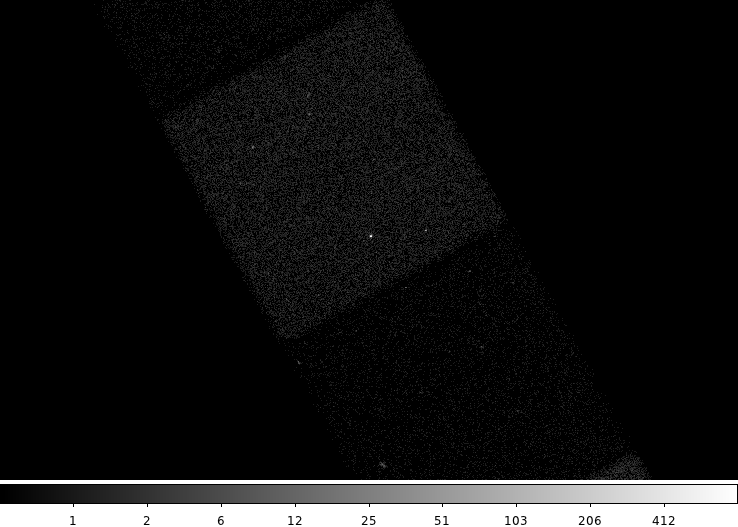

In [11]:
xpaset -p ds9 bin factor 4
xpaset -p ds9 saveimage png ds9_exercise04_a.png
display < ds9_exercise04_a.png

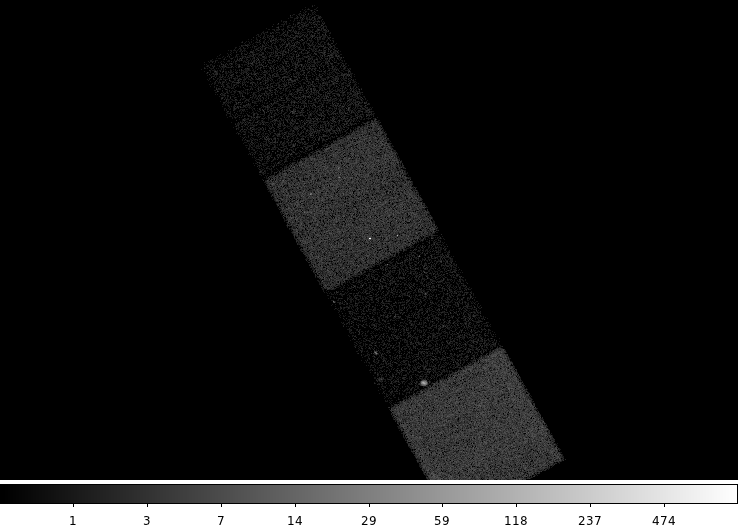

In [12]:
xpaset -p ds9 bin factor 8
xpaset -p ds9 saveimage png ds9_exercise04_b.png
display < ds9_exercise04_b.png

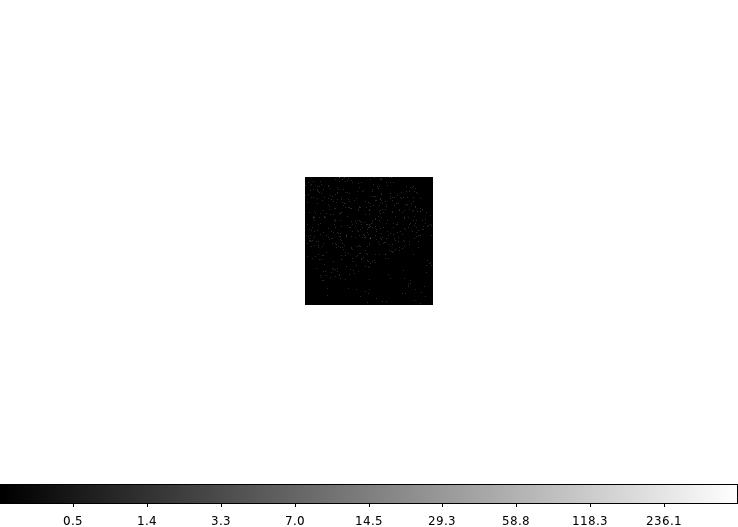

In [13]:
xpaset -p ds9 bin factor 1
xpaset -p ds9 zoom 0.125
xpaset -p ds9 saveimage png ds9_exercise04_c.png
display < ds9_exercise04_c.png

> Q:  Describe why the Bin 8 image is different than the image Zoom'ed by ⅛: 

**Zooming takes the default 1024x1024 image and samples every 8th row and column to create the display.  Binning rebins the original event file with 8x8 pixels.***


#### Exercise 5

ds9 bins all the events in the event file into an image.  That includes all events for all time and with all energies.

Use the Bin → Binning Parameters menu to add an energy=500:7000 as a Bin Filter.


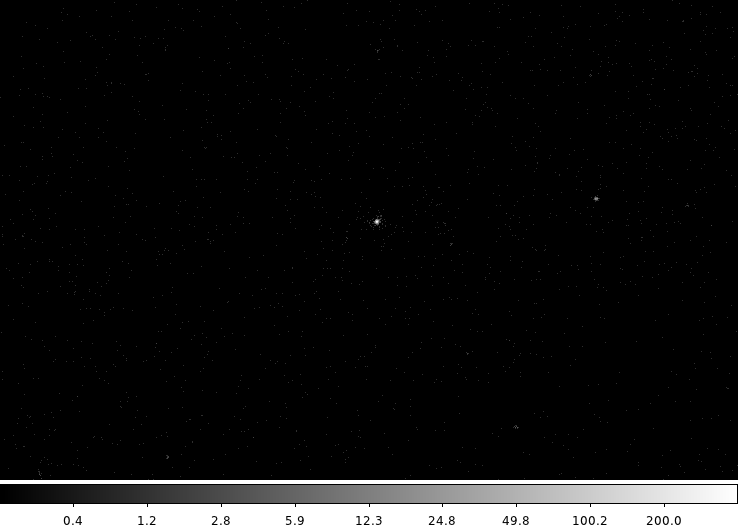

In [14]:
xpaset -p ds9 zoom to 1
xpaset -p ds9 bin filter 'energy=500:7000'
xpaset -p ds9 saveimage png ds9_exercise05_a.png
display < ds9_exercise05_a.png

> Q: Describe the difference in the images compared to the unfiltered image:   **Less background noise, max pixel value is lower (see colorbar scale compared to above)**

> Q: What unit is energy in?  **eV**

#### Extra Credit

Try different energy ranges

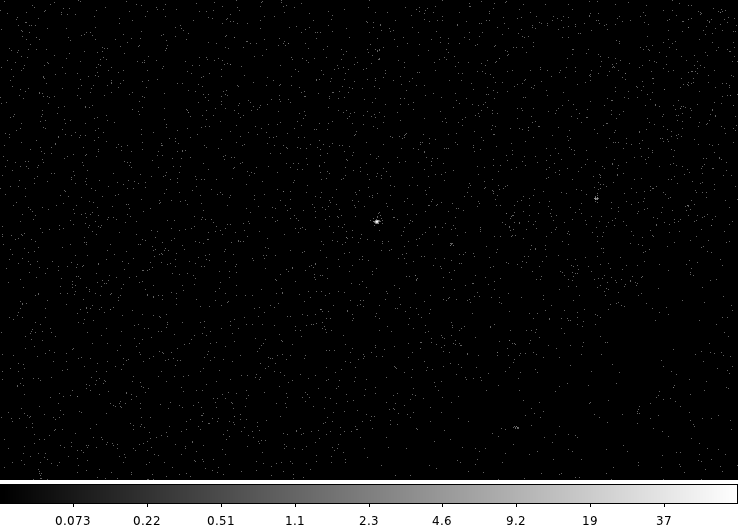

In [15]:
xpaset -p ds9 bin filter 'energy=2000:10000'
xpaset -p ds9 saveimage png ds9_exercise05_extra1.png
display < ds9_exercise05_extra1.png

Try different time ranges

In [16]:
dmlist 13858/primary/acisf13858N001_evt2.fits header | grep TST

0047 TSTART               456518974.4871399999 [s]       Real8        Observation start time (MET)
0059 TSTOP                456536836.1380900145 [s]       Real8        Observation end time (MET)
0085 STARTBEP             301280942                      Int4         BEP timer value at TSTART
0086 STOPBEP              1808980142                     Int4         BEP timer value at TSTOP
 --  HISTORY               PARM  :tstart=TSTART                                           ASC00210
 --  HISTORY               PARM  :tstop=TSTOP                                             ASC00211


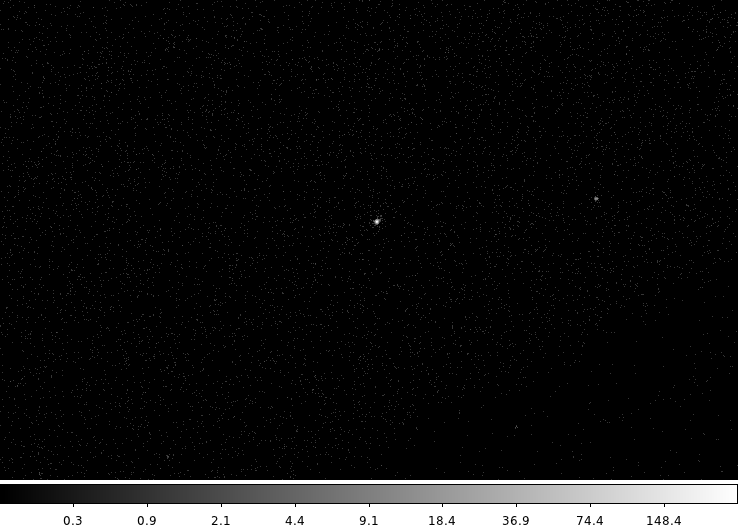

In [17]:
xpaset -p ds9 bin filter 'time=456520000:456530000'
xpaset -p ds9 saveimage png ds9_exercise05_extra2.png
display < ds9_exercise05_extra2.png

In [18]:
xpaset -p ds9 quit

[1]+  Done                    ds9 13858/primary/acisf13858N001_evt2.fits -scale log


### Inspect headers

Most Chandra data products are FITS files, specifically FITS binary tables, with extensive headers that fully describe the dataset.    Students should become familiar with some of the basic keywords and tool used to examine those keywords 


#### Exercise 7

Open the Level 2 event file in prism

The EVENTS extension is automatically selected.  The Header Keywords are shown in the top, right pane. 


In [19]:
prism 13858/primary/acisf13858N001_evt2.fits &

[1] 20767


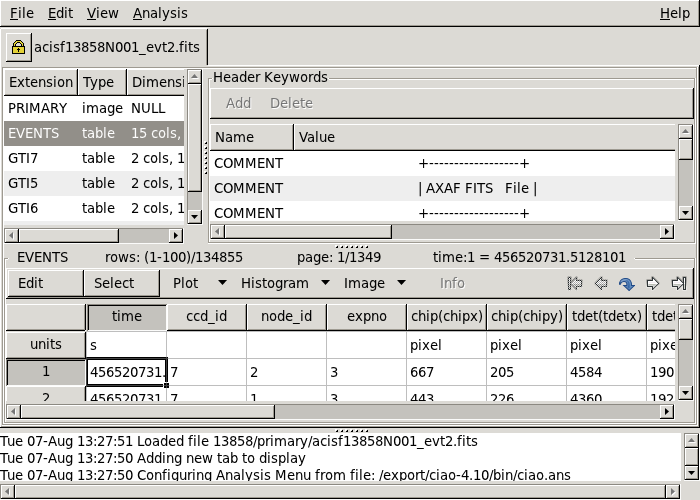

In [20]:
import -window prism prism_exercise7.png
display < prism_exercise7.png

> Q: Record the value for the following keywords:
- `MISSION  `: **AXAF**
- `TELESCOP `: **CHANDRA**
- `INSTRUME `: **ACIS**
- `DETNAM   `: **ACIS-5678**
- `GRATING  `: **NONE**
- `DATAMODE `: **FAINT**
- `READMODE `: **TIMED**
- `DATE-OBS `: **2012-06-19T18:49:34**
- `OBSERVER `: **Dr. Kayhan Gultekin**
- `ONTIME   `: **15069.1001159**


> Q: What units are the ACIS focal plane temperature, FP_TEMP, recorded in? **K**


In [21]:
xpaset -p prism quit

[1]+  Done                    prism 13858/primary/acisf13858N001_evt2.fits


#### Exercise 8

Use dmlist with the header option to display the header.


In [22]:
dmlist 13858/primary/acisf13858N001_evt2.fits header,clean | \
  egrep '^._TARG|^.*_NOM|^.*_PNT|^SIM_|^DTCOR|^ASCDSVER|^CALDBVER'

ASCDSVER             8.4.5                          Processing system revision
SIM_X                   -0.68282252473119 [mm]      SIM focus pos
SIM_Y                                   0 [mm]      SIM orthogonal axis pos
SIM_Z                     -190.1400660499 [mm]      SIM translation stage pos
RA_PNT                     138.7056392802 [deg]     Pointing RA
DEC_PNT                      8.8865713396 [deg]     Pointing Dec
ROLL_PNT                   241.1563944238 [deg]     Pointing Roll
RA_NOM                     138.7056392802 [deg]     Nominal RA
DEC_NOM                      8.8865713396 [deg]     Nominal Dec
ROLL_NOM                   241.1563944238 [deg]     Nominal Roll
DTCOR                    0.98693426381071           Dead time correction
CALDBVER             4.4.10                         


> Q: Record the value for the following header keywords: **see above**

> Q: This is an "ACIS-S" observation.  How can you tell this from the event file header information?  **There is nothing in the header that says this is an
'ACIS-S' observation directly.  The value of the `SIM_Z` keyword indicates that
the aim point is located on the ACIS-S array**

#### Extra Credit

In [23]:
dmkeypar 13858/primary/acisf13858N001_evt2.fits TIMEDEL echo+

3.14104


In [24]:
dmmakepar 13858/primary/acisf13858N001_evt2.fits[events] \
  dmmakepar_exercise08.par clob+

In [25]:
pdump dmmakepar_exercise08.par | \
  egrep -i '^._TARG|^.*_NOM|^.*_PNT|^SIM_|^DTCOR|^ASCDSVER|^CALDBVER'

ascdsver='8.4.5'
sim_x='-0.68282252473119'
sim_y='0'
sim_z='-190.14006604987'
ra_pnt='138.70563928021'
dec_pnt='8.8865713395653'
roll_pnt='241.15639442377'
ra_nom='138.70563928021'
dec_nom='8.8865713395653'
roll_nom='241.15639442377'
dtcor='0.98693426381071'
caldbver='4.4.10'


In [26]:
plist dmmakepar_exercise08.par | \
  egrep -i '^._TARG|^.*_NOM|^.*_PNT|SIM_|DTCOR|ASCDSVER|CALDBVER'

     (ascdsver = 8.4.5)           Processing system revision
        (sim_x = -0.68282252473119) SIM focus pos [mm]
        (sim_y = 0.0)             SIM orthogonal axis pos [mm]
        (sim_z = -190.14006604987) SIM translation stage pos [mm]
       (ra_pnt = 138.70563928021) Pointing RA [deg]
      (dec_pnt = 8.8865713395653) Pointing Dec [deg]
     (roll_pnt = 241.15639442377) Pointing Roll [deg]
       (ra_nom = 138.70563928021) Nominal RA [deg]
      (dec_nom = 8.8865713395653) Nominal Dec [deg]
     (roll_nom = 241.15639442377) Nominal Roll [deg]
        (dtcor = 0.98693426381071) Dead time correction
     (caldbver = 4.4.10)          


In [27]:
pget dmmakepar_exercise08.par \
  sim_x sim_y sim_z ra_pnt dec_pnt roll_pnt ra_nom dec_nom roll_nom \
  dtcor caldbver ascdsver 

-0.68282252473119
0
-190.14006604987
138.70563928021
8.8865713395653
241.15639442377
138.70563928021
8.8865713395653
241.15639442377
0.98693426381071
4.4.10
8.4.5


In [28]:
dmhistory 13858/primary/acisf13858N001_evt2.fits acis_process_events 

# dmhistory (CIAO 4.10): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.10): WARNING: Found and corrected "pixlib" library parameters

acis_process_events infile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/output/acisf13858_000N001_tmp_evt1.fits" outfile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/output/acisf13858_000N001_evt1.fits" acaofffile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/input/pcadf456520092N001_asol1.fits[time=456518974.4871400:456536836.1380900]" apply_cti="yes" apply_tgain="yes" alignmentfile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/input/pcadf456520092N001_asol1.fits[time=456518974.4871400:456536836.1380900]" obsfile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/output/axaff13858_000N001_obs0a.par" geompar="geom" logfile="/dsops/ap/sdp.10/opus/prs_run/tmp//ACIS_F_L1_456484176n330/output/acis_process_events.log" gradefile="CALDB" grade_image_file="CALDB" g

### Reprocess dataset

The Chandra calibration database (CALDB) is continually updated.  The then most recent CALDB is used for observations as they are taken. Some calibrations, such as the time dependent gain calibrations, can only be definitively computed based on historical observations; thus the file in the current CALDB is always predicted.    These calibrations are later updated to be definitive post facto. 

**The CIAO team strongly advises users to always reprocess data obtained from the archive.**


#### Exercise 9

Use chandra_repro to reprocess the dataset.


In [29]:
chandra_repro 13858 out= clob+


Processing input directory '/data/lenin2/Conf_and_Work/CIAO_Workshop_2018/13858'

Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.10): The following error occurred 2 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/13858/repro/acisf13858_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /data/lenin2/Con

In [30]:
dmdiff 13858/primary/acisf13858N001_evt2.fits 13858/repro/acisf13858_repro_evt2.fits data- || echo 

Infile 1:  13858/primary/acisf13858N001_evt2.fits
Infile 2:  13858/repro/acisf13858_repro_evt2.fits

-----------------------
HEADER VALUE DIFFERENCES
-----------------------

# dmdiff (CIAO 4.10): WARNING: header key "STARTMJF" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "STARTMNF" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "STOPMJF" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "STOPMNF" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "OBI_NUM" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "TIME_ADJ" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "CLSTBITS" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "STATFILT" not present in infile1.

Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not eq

In [31]:
dmkeypar 13858/primary/acisf13858N001_evt2.fits CALDBVER echo+
dmkeypar 13858/repro/acisf13858_repro_evt2.fits CALDBVER echo+
check_ciao_caldb

4.4.10
4.4.10
CALDB environment variable = /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/CALDB
             CALDB version = 4.7.9
             release date  = 2018-06-27T16:00:00 UTC
CALDB query completed successfully.


In [32]:
dmlist 13858/primary/acisf13858N001_evt2.fits counts
dmlist 13858/repro/acisf13858_repro_evt2.fits counts

134855  
134868  


> Q: Compare the header keyword values in the _repro_evt2.fits file with the evt2 file obtained from the archive.  Discuss the differences:  **We see newer calibration files are used (`GAINFILE`, `CTIFILE`, and `TGAINFIL`).  We see small diff in `ONTIME`.**


> Q: What version of the CALDB is installed?  What is the value of the CALDBVER keyword?  **It is unchanged.  `CALDBVER` is not updated by the tools; it's set in SDP.**


> Q: Compare the number of events in the reprocessed Level 2 event file with the number of events in the archived Level 2 event file.   Why are they same (or not the same)? 
**Slightly different.  New calibrations mean some good events go bad, some bad events
go good (grade migration) **


## Imaging Basics (Spatial Analysis)

In this section students will exercise some of the basic CIAO tools and scripts needed to perform basic imaging tasks.


### Detect Sources

One of the most common analysis tasks is to detect sources.

Please keep in mind:  CIAO detect tools only detect candidate sources and they are  not photometric tools.  The output from the detect tools should be used to guide further analysis.

See also:
- Wavdetect thread:  http://cxc.cfa.harvard.edu/ciao/threads/wavdetect/
- Using detect output: http://cxc.cfa.harvard.edu/ciao/threads/detect_output/




#### Exercise 10

In this exercise students should complete the following steps

1. Create image and exposure map.  Run the fluximage script on the dataset.  Students should be sure to set the binsize=1 and set bands=default or bands=broad.

2. Create the psfmap.  Run mkpsfmap using the fluximage output image as input.  Students should use energy=1.4967 ecf=0.393

3. Detect Sources.  Run wavdetect on the fluximage output counts image, using the exposure map and psfmap.  Students should select a set of wavelet scales to use that is appropriate for the dataset being analyzed. 




In [33]:
fluximage 13858/repro/acisf13858_repro_evt2.fits out=acisf13858 bin=1 bands=broad clob+ mode=h

Running fluximage
Version: 12 September 2016

Using CSC ACIS broad science energy band.
Aspect solution 13858/repro/pcadf456520092N001_asol1.fits found.
Bad-pixel file 13858/repro/acisf13858_repro_bpix1.fits found.
Mask file 13858/repro/acisf13858_000N001_msk1.fits found.

The output images will have 2937 by 4168 pixels, pixel size of 0.492 arcsec,
    and cover x=2735.5:5672.5:1,y=1838.5:6006.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 13858
Creating 4 instrument maps for obsid 13858
# DMCOPY (CIAO 4.10): WARNING: Creating large image: 98 MB. Current max set at 50 MB.
Increase maximum using [opt mem=n] or increase blocking to reduce size.
Creating 4 exposure maps for obsid 13858
Combining 4 exposure maps for obsid 13858
Thresholding data for obsid 13858
Exposure-correcting image for obsid 13858

The following files were created:

 The clipped counts image is:
     acisf13858_broad_thresh.img

 The clipped exposure map is:
     acisf13858_bro

In [34]:
mkpsfmap acisf13858_broad_thresh.img acisf13858_broad.psfmap \
  energy=1.4967 ecf=0.393 mode=h clob+

In [35]:
pset wavdetect \
  infile=acisf13858_broad_thresh.img \
  expfile=acisf13858_broad_thresh.expmap \
  psffile=acisf13858_broad.psfmap \
  scales='1.4 2 4 8 12 16 24 32' \
  outfile=acisf13858_wav.src \
  scellfile=acisf13858_wav.cell \
  imagefile=acisf13858_wav.recon \
  defnbkg=acisf13858_wav.nbkg \
  clob+

wavdetect mode=h
  

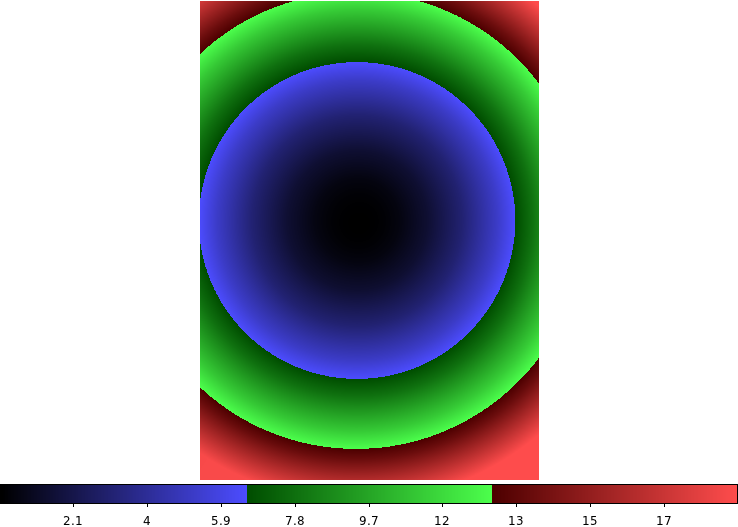

In [36]:
ds9 acisf13858_broad.psfmap -scale linear -cmap standard -zoom to fit \
  -saveimage png ds9_exercise10_a.png -quit

display < ds9_exercise10_a.png

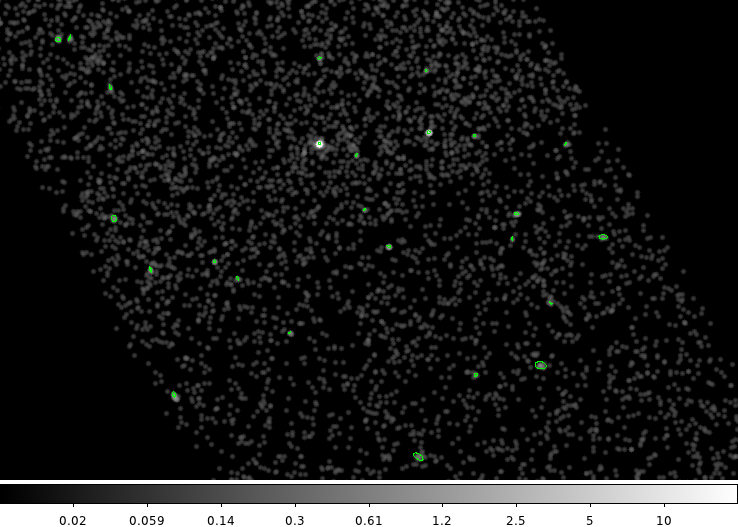

In [37]:
ds9 acisf13858_broad_thresh.img -block 2 -scale log -region acisf13858_wav.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_b.png -quit

display < ds9_exercise10_b.png

> Q: Display the PSF map in ds9.  Why does it look the way it does? **Chandra PSF increases in size the further away from optical axis.**


> Q: Record choice of wavelet scales and why that set was selected:  **above.  Pseduo sqrt(2) used to detect srcs across field**

> Q: Open the broad-band image in ds9 and load the source list as a region file.  Comment on the detected sources and any missed detections: **src detects look good ; regions are a little small; maybe some faint stuff missed**


> Q: Are the ellipses the position error or the apparent size of the source? 
**They are a measure of the observed source size.  They are not the intrinsic (deconvolved) source size, nor are they the position error.**




#### Extra Credit

Try differenct wavelet scales

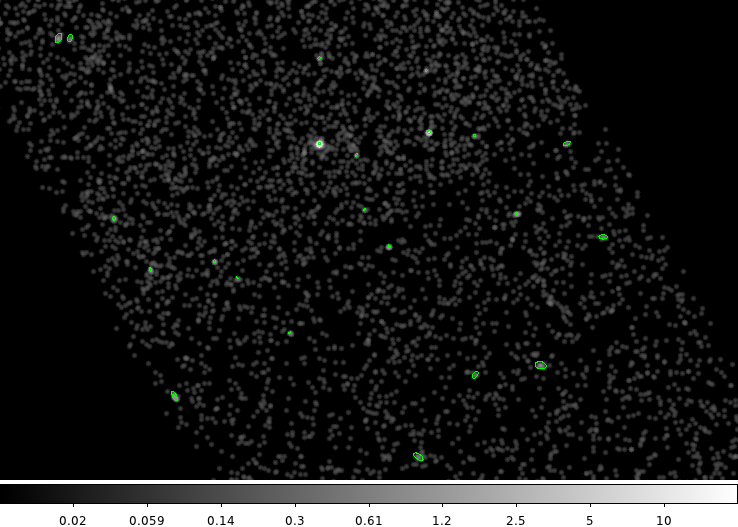

In [38]:
wavdetect scales='1 4 16 64' mode=h clobber=yes outfile=fewscales.src

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region fewscales.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec1.png -quit

display < ds9_exercise10_ec1.png


Try different significance thresholds, sigthresh.

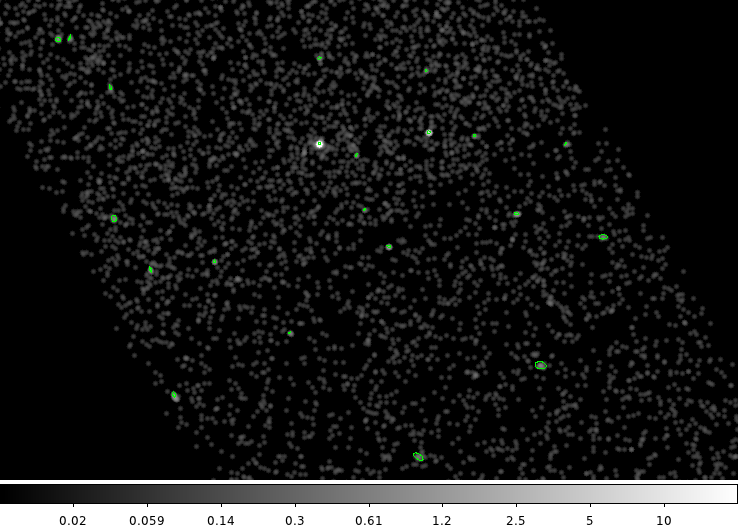

In [39]:
wavdetect sigthresh=1e-7 mode=h clobber=yes outfile=lowersigthresh.src

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region lowersigthresh.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec2.png -quit

display < ds9_exercise10_ec2.png


Try different ecf values when making the PSF map.

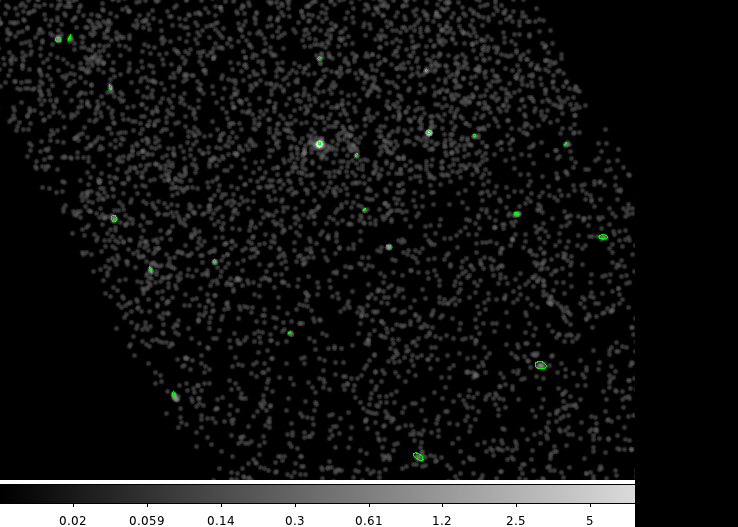

In [40]:
mkpsfmap acisf13858_broad_thresh.img ecf90.psfmap \
  energy=1.4967 ecf=0.90 mode=h clob+
  
wavdetect mode=h clobber=yes outfile=ecf90.src psffile=ecf90.psfmap

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region lowersigthresh.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec3.png -quit

display < ds9_exercise10_ec3.png

Try different energy bands.

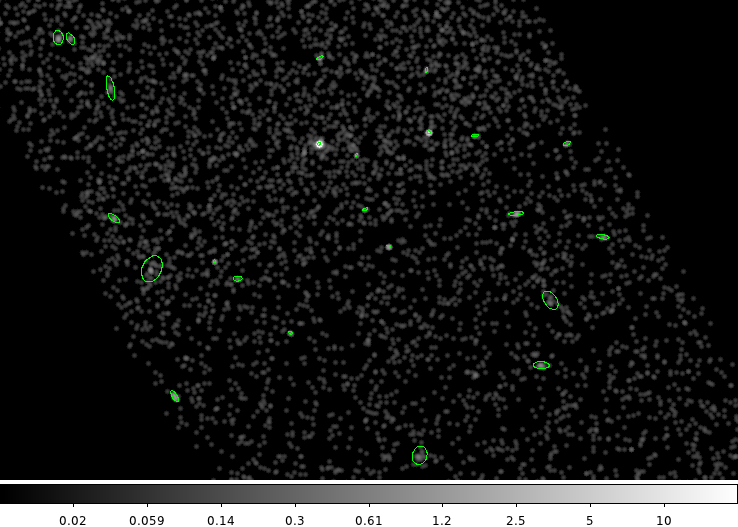

In [41]:
mkpsfmap acisf13858_broad_thresh.img 5keV.psfmap \
  energy=5.0 ecf=0.90 mode=h clob+
  
wavdetect mode=h clobber=yes outfile=5keV.src psffile=5keV.psfmap

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region 5keV.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec4.png -quit

display < ds9_exercise10_ec4.png

Try using the celldetect tool. 

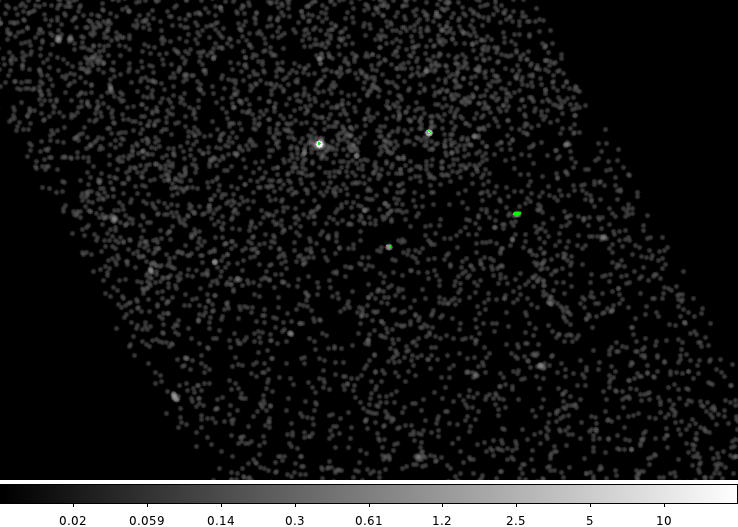

In [42]:
celldetect acisf13858_broad_thresh.img \
  expstk=acisf13858_broad_thresh.expmap \
  out=acisf13858_cell.src \
  clob+ mode=h

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region acisf13858_cell.src \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec5.png -quit

display < ds9_exercise10_ec5.png

Try using the vtpdetect tool.

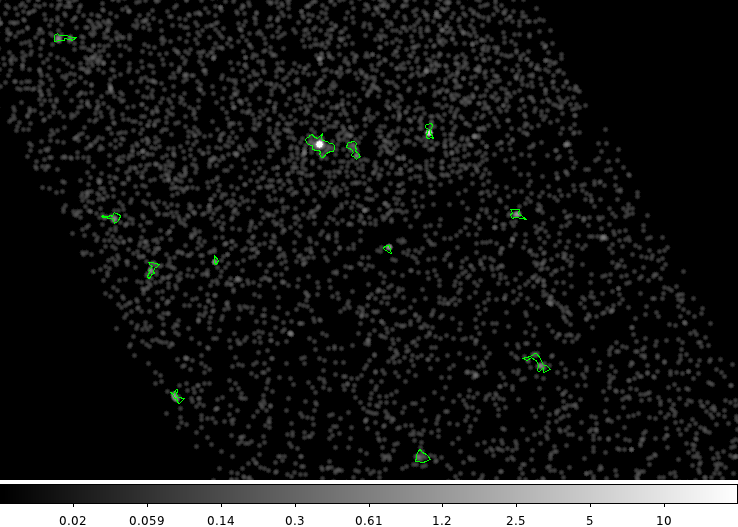

In [43]:
vtpdetect acisf13858_broad_thresh.img \
  exp=acisf13858_broad_thresh.expmap \
  out=acisf13858_vtp.src \
  clob+ mode=h

ds9 acisf13858_broad_thresh.img -block 2 -scale log -region acisf13858_vtp.src[src_region] \
   -scale limits 0 20 -smooth -saveimage png ds9_exercise10_ec6.png -quit

display < ds9_exercise10_ec6.png

### Create regions in ds9

The detect tools are one way to create regions automatically.  However, often users analyzing a single source in an observation will simply create their own region in ds9 and then use those regions with the CIAO tools.


#### Exercise 11

1. Open the broad-band counts image in ds9.
2. Create a source region. Draw a circular source region around the bright source in the center of the image.
3. Save the region, ds9_src.reg.  Use ds9 format and celestial (world) coordinates.
4. Delete the source region.
5. Create a background region.  Draw an annulus around the same source.  The inner annulus region should be larger than the source region.  The outer region should be large enough to get a large number of counts, but should be small enough to avoid any nearby source or any instrumental features (like the gaps between chips).
6. Save the region, ds9_bkg.reg.  Use CIAO format and physical coordinates.



In [44]:
ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical &

[1] 31051


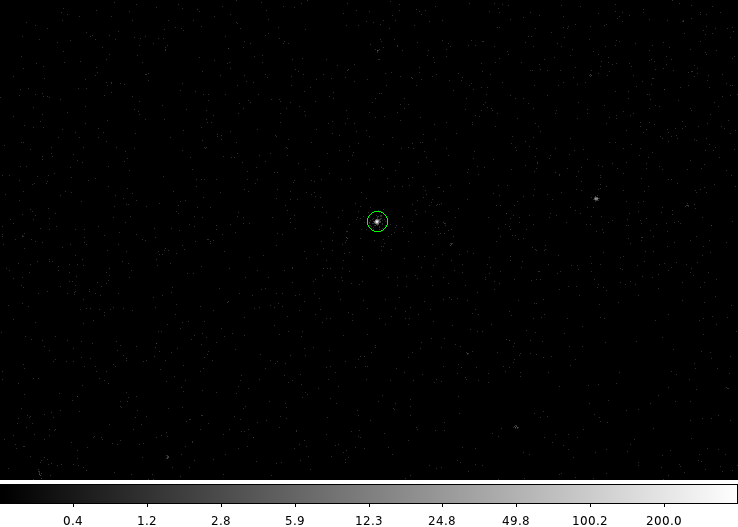

# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(9:14:49.0898,+8:53:20.988,4.920")


In [45]:
echo "physical;circle(4104.5,4115.5,10)" | xpaset ds9 region
xpaset -p ds9 saveimage png ds9_exercise11_a.png
xpaget ds9 regions -format ds9 -system wcs -skyformat sexagesimal > ds9_src.reg
xpaset -p ds9 regions delete all
display < ds9_exercise11_a.png
cat ds9_src.reg

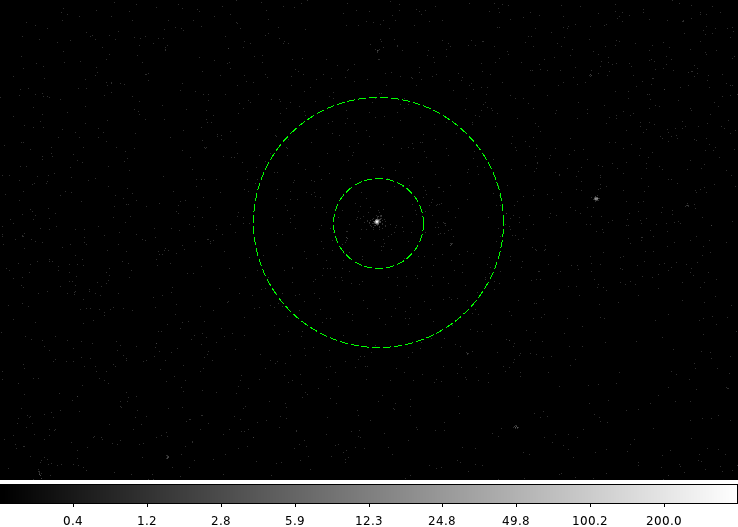

annulus(4105.5,4113.5,45,125)


In [46]:
echo "physical;annulus(4105.5,4113.5,45,125) # background" | xpaset ds9 region
xpaset -p ds9 saveimage png ds9_exercise11_b.png
xpaget ds9 regions -format ciao -system physical > ds9_bkg.reg
xpaset -p ds9 regions delete all
display < ds9_exercise11_b.png
cat ds9_bkg.reg

In [47]:
xpaset -p ds9 quit

[1]+  Done                    ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical


> Q: Record the source location used: **see above**


> Q: Describe the differences between the CIAO format and the ds9 format regions: 
**ds9 format includes meta-data: color, linestyle, etc.**


#### Exercise 12

Compute source centroid.  In this exercise students will use the dmstat tool to compute the source centroid in their region.

1. Use dmcopy to filter the flux image thresh.img using the source region file.
2. Use dmlist with the blocks option to display info about the filtered output image.
3. Use dmstat with the centroid=yes option to compute the centroid of the counts in the filtered image.
4. Use dmcopy to filter the Level 2 event file using the source region file and to bin it into an image with binsize=1.
5. Use dmlist with the blocks option to display info about the filtered and binned image.
6. Use dmstat with centroid=yes option to compute the centroid of the counts in the filtered and binned image.




In [48]:
dmcopy "acisf13858_broad_thresh.img[sky=region(ds9_src.reg)]" dmcopy_e12_src.fits clob+

In [49]:
dmlist dmcopy_e12_src.fits blocks,cols

 
--------------------------------------------------------------------------------
Dataset: dmcopy_e12_src.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: EVENTS_IMAGE                   Image      Int4(21x21)
 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[21,21]               Int4(21x21)    -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    s

In [50]:
dmstat dmcopy_e12_src.fits cen+ sig- med+

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4102 4106 )
    max:	399 	      @:	( 4104 4116 )
cntrd[log] :	( 11.475524476 11.817482517 )
cntrd[phys]:	( 4104.4755245 4115.8174825 )
   good:	316 
   null:	125 


In [51]:
dmcopy 13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_src.reg)][bin sky=1]" \
  dmcopy_e12_evtsrc.fits clob+

In [52]:
dmlist dmcopy_e12_evtsrc.fits blocks,cols

 
--------------------------------------------------------------------------------
Dataset: dmcopy_e12_evtsrc.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: EVENTS_IMAGE                   Image      Int2(20x20)
Block    2: GTI7                           Table         2 cols x 1        rows
Block    3: GTI5                           Table         2 cols x 1        rows
Block    4: GTI6                           Table         2 cols x 1        rows
Block    5: GTI8                           Table         2 cols x 1        rows
 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1

In [53]:
dmstat dmcopy_e12_evtsrc.fits cen+ sig- med+ 

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4101.9408797 4105.9658198 )
    max:	436 	      @:	( 4103.9408797 4115.9658198 )
cntrd[log] :	( 10.511035654 10.842671194 )
cntrd[phys]:	( 4104.4519153 4115.808491 )
   good:	316 
   null:	84 


> Q: Is the filtered image the same size as the fluximage output image size?  Why? 
**The CXCDM shrinks the image to the size of the region (by default)**

> Q: Record the centroid of fluximage output filtered image:
**4104.4755245, 4115.8174825**

> Q: What are the good and null values that dmstat reports? 
**The number of pixels outside the circle**

> Q: Is the image created by filtering and binning the event file the same size as the other images?  Why?
**No. (20x20 vs 21x21).  Filter image vs. Filter table then bin into an image**

> Q: Record the centroid of the event file filter and binned image: 
**4104.4519153, 4115.808491**

> Q: Is the centroid the same for the two images?  Why?  (Hint: what energies are being used?)
**Opps, no energy filter on the event file -- but image was made with broad band (500:7000eV).**



### Aperture Photometry

Obtaining the counts (or count rate) is the first step in computing the source flux.  



#### Exercise 13

In this exercise students will use the CIAO analysis menu, aka dax, to get the net counts in their regions (from Exercise 11).

1. Open the fluximage thresh.img in ds9.
2. Load the source region file created in Exercise 11 step 3.
3. Load the background region file created in Exercise 11 step 6.
4. Double click on the background annulus to display the region properties.
5. Under the Property menu, select Background.  The region will now be drawn with a dashed line.  Close the properties window.
6. In the main ds9 window, goto Analysis →CIAO →Statistics → Net Counts.
7. A text window will be display containing the information about the current regions.
8. Try adjusting the source and background radii and repeating the analysis.






In [54]:
$ASCDS_INSTALL/bin/ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical &

[1] 31206


In [55]:
xpaset -p ds9 regions ds9_bkg.reg 
xpaset -p ds9 regions select all
xpaset -p ds9 regions background

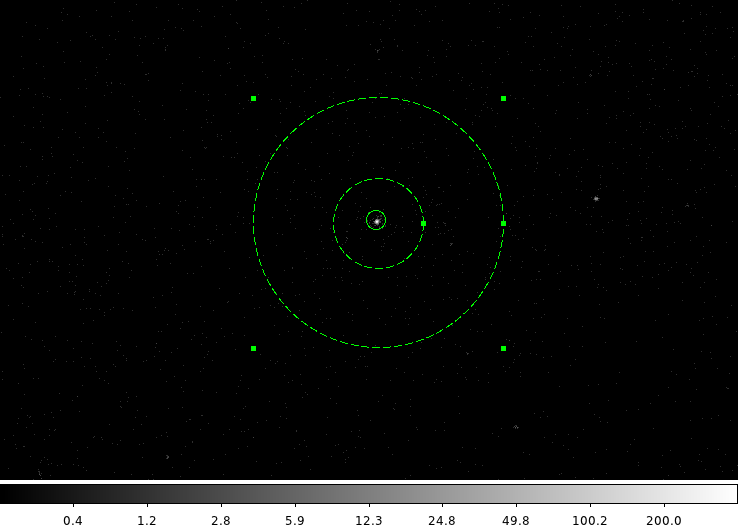

In [56]:
xpaset -p ds9 regions ds9_src.reg
xpaset -p ds9 saveimage png exercise_13_ds9a.png
display < exercise_13_ds9a.png 

In [57]:
xpaset -p ds9 analysis task "{Net Counts}"

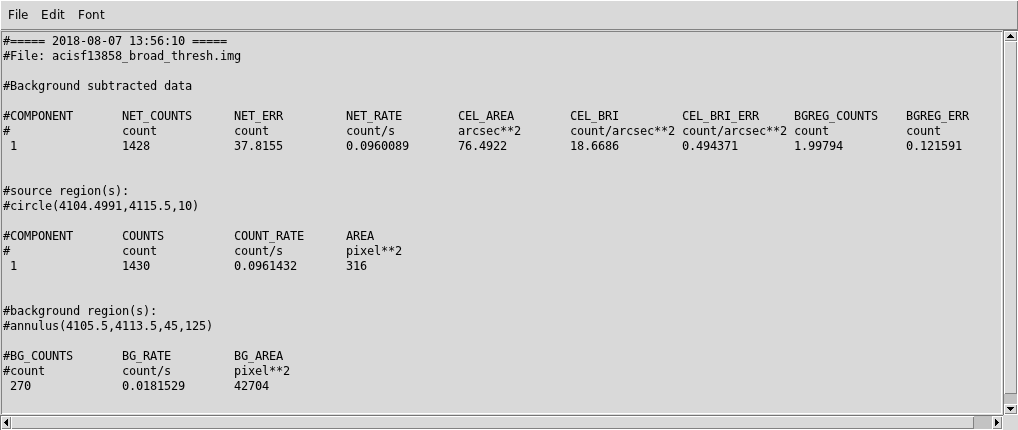

In [58]:
import -window 'Net Counts' exercise_13_a.png
display < exercise_13_a.png

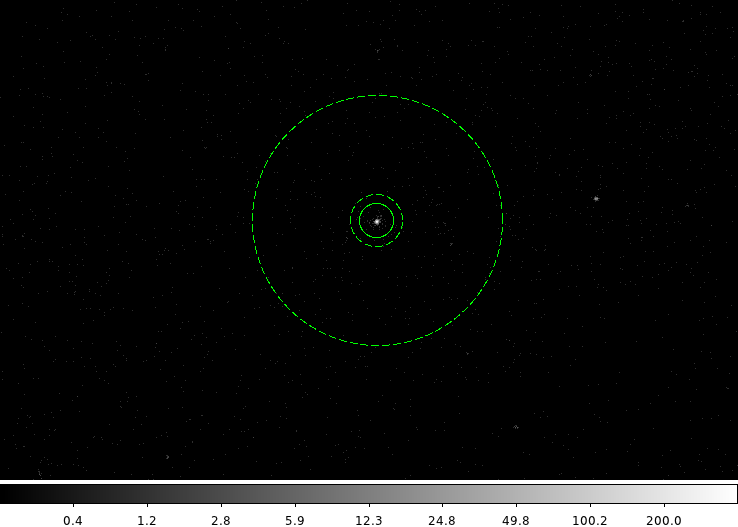

In [59]:
xpaset -p ds9 regions delete all
echo "physical; circle(4104.4434,4115.8478,17.145457)" | xpaset ds9 regions
echo "physical; annulus(4104.5,4115.5,26.305893,125) # background" | xpaset ds9 regions
xpaset -p ds9 saveimage png exercise_13_ds9b.png
display < exercise_13_ds9b.png


In [60]:
xpaset -p ds9 analysis task "{Net Counts}"

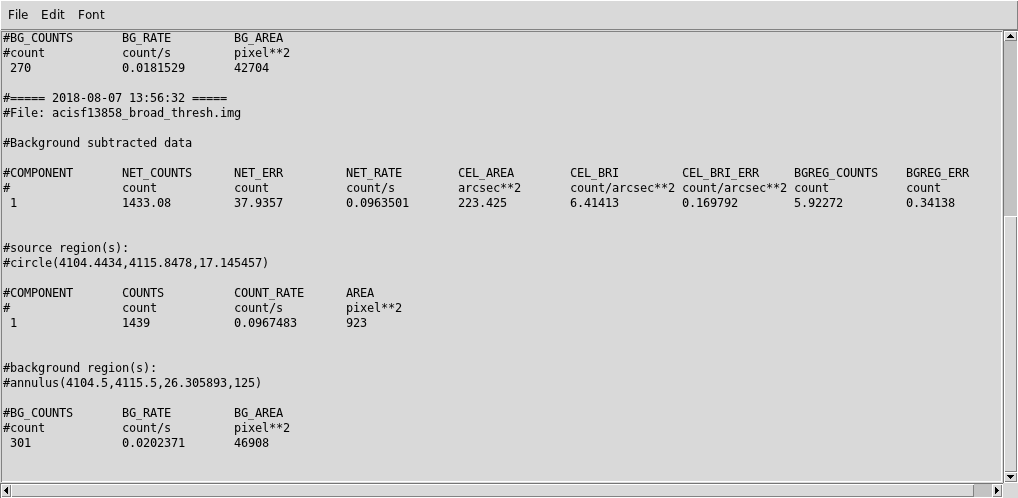

In [61]:
import -window 'Net Counts' exercise_13_b.png
display < exercise_13_b.png

In [62]:
xpaset -p ds9 quit

[1]+  Done                    $ASCDS_INSTALL/bin/ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical


> Q: From step 7, record the following information from the Net Counts task:
- Net counts with error: **1428 +/- 37.85**
- Source counts:      **1430**
- Background counts:  **270**


> Q: From step 8, describe how the net counts and net rates vary with changes to the source and background regions:  **net rate doesn't change much as bkg gets bigger/smaller (ie background is flat)**


#### Exercise 14


In this exercise students will use the `srcflux` script to get various estimates of the flux of the source.

1. Obtain the source location in celestial coordinates from the source region file created in Exercise 11 step 3.
2. Run the srcflux script on the reprocessed level 2 event file, using the position, pos, from step 1.  All other parameters should remain at their defaults.
3. Repeat step 2, using a different outroot and psfmethod=arfcorr
4. Repeat step 3, using a different outroot, model="xsbbody.black_body" and paramvals="black_body.kT=1".
5. Repeat step 4, using bands="hard".


In [63]:
punlearn dmcoords
dmcoords 13858/repro/acisf13858_repro_evt2.fits op=sky x=4104.4755245 y=4115.8174825 celfmt=hms verb=0
pget dmcoords ra dec

09:14:49.088
+08:53:21.16


In [64]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step2 clob+ mode=h

srcflux
          infile = 13858/repro/acisf13858_repro_evt2.fits
             pos = 09:14:49.088, +08:53:21.16
         outroot = exercise14_step2
           bands = broad
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.9
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.pow1
       paramvals = pow1.PhoIndex=2.0
        absmodel = xsphabs.abs1
       absparams = abs1.nH=%GAL%
           abund = angr
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = /tmp
         clobber = yes
         verbose = 1
            mode = h

Processing OBI 000
Extracting counts
Setting Ideal PSF : alpha=1 , beta=0
Getting net rate and confidence limits
Getting model independent fluxes 
Getting model fluxes 
Getting photon fluxes 
Running tasks in pa

In [65]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step3 \
  psfmethod=arfcorr \
  clob+ mode=h verbose=0

cat exercise14_step3_summary.txt



Summary of source fluxes

      Position                               0.5 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0962 c/s (0.0917,0.101)               
                              Flux           7.3E-13 erg/cm2/s (6.96E-13,7.64E-13)   
                              Mod.Flux       6.74E-13 erg/cm2/s (6.43E-13,7.06E-13)  
                              Unabs Mod.Flux 7.25E-13 erg/cm2/s (6.91E-13,7.6E-13)   



In [66]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step4 \
  psfmethod=arfcorr \
  model="xsbbody.black_body" paramvals="black_body.kT=1" \
  clob+ mode=h verbose=0

cat exercise14_step4_summary.txt



Summary of source fluxes

      Position                               0.5 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0962 c/s (0.0917,0.101)               
                              Flux           7.3E-13 erg/cm2/s (6.96E-13,7.64E-13)   
                              Mod.Flux       1.01E-12 erg/cm2/s (9.63E-13,1.06E-12)  
                              Unabs Mod.Flux 1.03E-12 erg/cm2/s (9.79E-13,1.08E-12)  



In [67]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step5 \
  psfmethod=arfcorr \
  model="xsbbody.black_body" paramvals="black_body.kT=1" \
  band="hard" \
  clob+ mode=h verbose=0

cat exercise14_step5_summary.txt



Summary of source fluxes

      Position                               2.0 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0185 c/s (0.0164,0.0205)              
                              Flux           3.12E-13 erg/cm2/s (2.78E-13,3.46E-13)  
                              Mod.Flux       2.91E-13 erg/cm2/s (2.59E-13,3.23E-13)  
                              Unabs Mod.Flux 2.92E-13 erg/cm2/s (2.6E-13,3.24E-13)   



> Q: Record the net count rate, model independent flux, model flux from steps 2 through 5

|            | Step 2        | Step 3        | Step 4           | Step 5        |
|------------|---------------|---------------|------------------|---------------|
| Count Rate | 0.827         | 0.962         | 0.962            | 0.0185        |
| Flux       | 5.6E-13       | 7.3E-13       | 7.3E-13          | 3.12E-13      |
| Model Flux | 5.8E-13       | 6.74E-13      | 1.0E-12          | 2.91E-13      |


> Q: Discuss the differences in the estimated fluxes obtained in steps 2 through 5.


#### Extra Credit



Try using psfmethod=quick and psfmethod=marx 

In [68]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step_ec1 \
  psfmethod=quick \
  clob+ mode=h verbose=0

cat exercise14_step_ec1_summary.txt



Summary of source fluxes

      Position                               0.5 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0955 c/s (0.091,0.1)                  
                              Flux           6.45E-13 erg/cm2/s (6.15E-13,6.75E-13)  
                              Mod.Flux       6.69E-13 erg/cm2/s (6.38E-13,7.01E-13)  
                              Unabs Mod.Flux 7.2E-13 erg/cm2/s (6.86E-13,7.54E-13)   



In [69]:
source $ASCDS_INSTALL/marx-5.3.3/setup_marx.sh
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step_ec2 \
  psfmethod=marx \
  clob+ mode=h verbose=0

cat exercise14_step_ec2_summary.txt



Summary of source fluxes

      Position                               0.5 - 7.0 keV                           
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0985 c/s (0.0939,0.103)               
                              Flux           7.84E-13 erg/cm2/s (7.47E-13,8.21E-13)  
                              Mod.Flux       6.9E-13 erg/cm2/s (6.58E-13,7.23E-13)   
                              Unabs Mod.Flux 7.43E-13 erg/cm2/s (7.08E-13,7.78E-13)  



|            | ideal         | quick         | arfcorr          | marx          |
|------------|---------------|---------------|------------------|---------------|
| Count Rate | 0.827         | 0.962         | 0.955            | 0.0985        |
| Flux       | 5.6E-13       | 7.3E-13       | 6.5E-13          | 7.84E-13      |
| Model Flux | 5.8E-13       | 6.74E-13      | 6.7E-12          | 6.90E-13      |


Try other spectral model and other model parameters.

Try other energy bands (2-10 keV is a common band in the literature).

In [70]:
punlearn srcflux
srcflux 13858/repro/acisf13858_repro_evt2.fits "09:14:49.088, +08:53:21.16" exercise14_step_ec4 \
  psfmethod=quick band="2.0:10.0:3.0" \
  clob+ mode=h verbose=0

cat exercise14_step_ec4_summary.txt



Summary of source fluxes

      Position                               2.0 - 10.0 keV                          
                                             Value        90% Conf Interval          
#0001|9 14 49.08 +8 53 21.1   Rate           0.0181 c/s (0.0162,0.0201)              
                              Flux           3.16E-13 erg/cm2/s (2.82E-13,3.51E-13)  
                              Mod.Flux       3.63E-13 erg/cm2/s (3.24E-13,4.03E-13)  
                              Unabs Mod.Flux 3.65E-13 erg/cm2/s (3.25E-13,4.05E-13)  



### Simulate PSF


The Chandra Point Spread Function (PSF) varies spatially across the field of view as well with energy.  There is no analytic model of the PSF.  The only way to obtain an estimate of the Chandra PSF for detailed spatial analysis is by simulation.  

The psfmethod used by srcflux are only appropriate when integrating over a region.  The pixel-to-pixel variations used in those methods is insufficient for any type of analysis that requires detailed spatial information.

There are two different simulators users can use.  
1. SAOTrace is the definitive mirror model and is made available to users via the ChaRT web interface.
2. MARX is the end-to-end Chandra simulator used to calibrate the HETG gratings and includes a fairly accurate mirror model and detector models. 




#### Exercise 15


In this exercise Students will simulate the PSF using ChaRT and with MARX.  The simulate_psf script is used to create PSF images that are appropriate for further data analysis.

1. Ensure that MARX is installed and that MARX_ROOT is set.
2. Run ChaRT.  http://cxc.cfa.harvard.edu/ciao/PSFs/chart2/index.html To run ChaRT users need to know the source location (celestial coordinates), an estimate of the photon flux (from the srcflux .flux output files), and an estimate of the energy.  Students may be provided with a set of ChaRT output ray files.
3. Run the simulate_psf script.  Use the reprocessed level 2 event file as the infile and the coordinates of the source, in decimal degrees, for the ra and dec parameters.  Use simulator=file and provide the stack of ray files obtained from ChaRT for the rayfile parameter.  Set minsize=128 to obtain a reasonable size output image.
4. Display the reprocessed level 2 event file in one ds9 frame and the simulate_psf output PSF in a 2nd frame.  Tile the frames horizontally and save the image as a PNG file.
5. Run simulate_psf with a different outroot, this time using simulator=marx and set the numiter parameter to the same number of iterations as were used with ChaRT.  monoenergy=1.0 and flux=1e-4 can be used for the spectral model.
6. Repeat step 4 using the MARX generated PSF.



In [71]:
source $ASCDS_INSTALL/marx-5.3.3/setup_marx.sh

In [72]:
dmkeypar exercise14_step2_broad.flux net_photflux_aper echo+

0.000220748657172049


In [73]:
curl \
  -F email=${USER}@head.cfa.harvard.edu \
  -F coords=cel \
  -F ra=09:14:49.088  \
  -F dec=+08:53:21.16 \
  -F asol=obi \
  -F obsid=13858 \
  -F obinum=0\
  -F niter=10\
  -F randseed=32767 \
  -F energy=mono \
  -F mono=2.3 \
  -F flux=0.000221 \
http://saotrace.cfa.harvard.edu/cgi-bin/runwrapper


    <html>
    <head><title>ChaRT Job Submitted</title></head>
    <body>
        <h1>ChaRT v2</h1>
    Job submitted.  You will recieve an email from cxc_rays@head.cfa.harvard.edu when the job is complete or if there are any errors.
    </body>
    </html>


In [74]:
curl -o rays.tar.gz ftp://saotrace.cfa.harvard.edu/pub/ChaRT/HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered.tar.gz
tar xvfz rays.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1868k  100 1868k    0     0  8130k      0 --:--:-- --:--:-- --:--:-- 9533k
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0004_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0002_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0009_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0008_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0001_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0003_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0000_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0005_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0007_rays.fits
HRMA_ra138.70453_dec8.88921_en2.3_flux0.000221_dithered_i0006_rays.fits


In [75]:
simulate_psf 13858/repro/acisf13858_repro_evt2.fits \
  chart_sim ra=138.70453 dec=8.88921 \
  simulator=file rayfile="HRMA*rays.fits" \
  minsize=128 mode=h

simulate_psf
          infile = 13858/repro/acisf13858_repro_evt2.fits
         outroot = chart_sim
              ra = 138.70453
             dec = 8.88921
    spectrumfile = 
      monoenergy = 1
            flux = 0.0001
       simulator = file
         rayfile = HRMA*rays.fits
       projector = marx
     random_seed = -1
            blur = 0.07000000000000001
  readout_streak = no
          pileup = no
           ideal = yes
        extended = yes
         binsize = 1
          numsig = 7
         minsize = 128
         numiter = 1
        keepiter = no
        asolfile = 
       marx_root = /export/ciao-4.10/marx-5.3.3
         verbose = 1
            mode = h

Started check_setup
Finished check_setup
10 rayfiles provided; ignoring numiter=1 parameter
Performing iteration 1 of 10
Started run_marx
Finished run_marx
Started create_psf_image
Finished create_psf_image
Performing iteration 2 of 10
Started run_marx
Finished run_marx
Started create_psf_image
Finished create_psf_image
Per

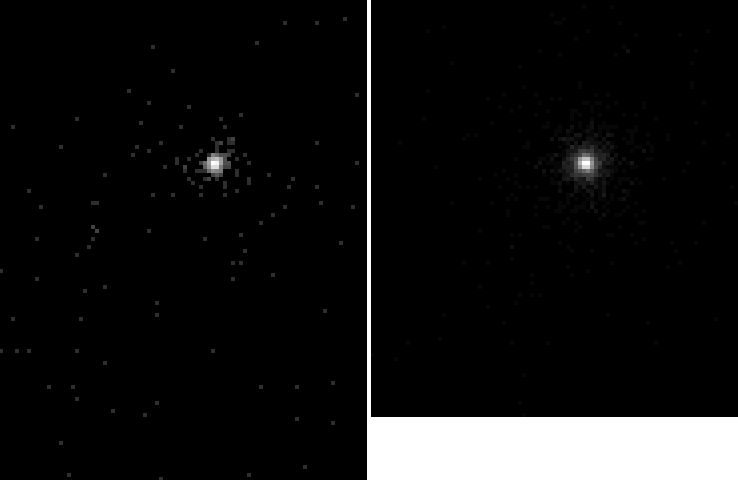

In [76]:
ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical \
  -zoom to 4 \
  chart_sim.psf -pan to 4096.5 4096.5 physical \
  -view colorbar no \
  -saveimage png ds9_exercise15_a.png -quit 

display < ds9_exercise15_a.png
  

In [77]:
simulate_psf 13858/repro/acisf13858_repro_evt2.fits \
  marx_sim ra=138.70453 dec=8.88921 \
  simulator=marx \
  minsize=128 mode=h \
  mono=2.3 flux=0.000221 numiter=10 
  

simulate_psf
          infile = 13858/repro/acisf13858_repro_evt2.fits
         outroot = marx_sim
              ra = 138.70453
             dec = 8.88921
    spectrumfile = 
      monoenergy = 2.3
            flux = 0.000221
       simulator = marx
         rayfile = 
       projector = marx
     random_seed = -1
            blur = 0.07000000000000001
  readout_streak = no
          pileup = no
           ideal = yes
        extended = yes
         binsize = 1
          numsig = 7
         minsize = 128
         numiter = 10
        keepiter = no
        asolfile = 
       marx_root = /export/ciao-4.10/marx-5.3.3
         verbose = 1
            mode = h

Started check_setup
Finished check_setup
Performing iteration 1 of 10
Started run_marx
Finished run_marx
Started create_psf_image
Finished create_psf_image
Performing iteration 2 of 10
Started run_marx
Finished run_marx
Started create_psf_image
Finished create_psf_image
Performing iteration 3 of 10
Started run_marx
Finished run_marx


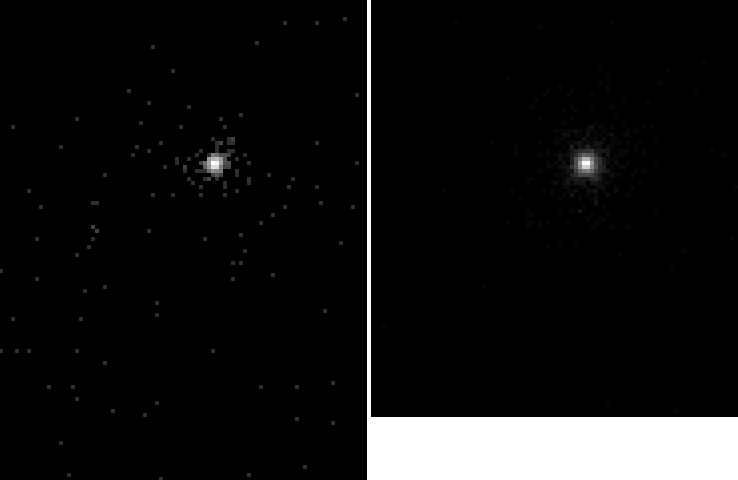

In [78]:
ds9 acisf13858_broad_thresh.img -scale log -pan to 4096.5 4096.5 physical \
  -zoom to 4 \
  marx_sim.psf -pan to 4096.5 4096.5 physical \
  -view colorbar no \
  -saveimage png ds9_exercise15_b.png -quit 

display < ds9_exercise15_b.png
  

> Q: Comment on a visual comparison of the ChaRT/SAOTrace PSF to the observation: 

> Q: Comment on a visual comparison of the MARX PSF to the observation: 

> Q: Describe any differences between the MARX and ChaRT PSFs: 

> Q: Is this a point source?



#### Extra Credit

Try setting simulate_psf readout_streak=yes.  Try pileup=yes.  Try blur=0.20

In [79]:
simulate_psf 13858/repro/acisf13858_repro_evt2.fits \
  marxA_sim ra=138.70453 dec=8.88921 \
  simulator=marx \
  minsize=128 mode=h \
  mono=2.3 flux=0.000221 numiter=10 verb=0 readout+


In [80]:
simulate_psf 13858/repro/acisf13858_repro_evt2.fits \
  marxB_sim ra=138.70453 dec=8.88921 \
  simulator=marx \
  minsize=128 mode=h \
  mono=2.3 flux=0.000221 numiter=10 verb=0 pileup+ ext-


In [81]:
simulate_psf 13858/repro/acisf13858_repro_evt2.fits \
  marxC_sim ra=138.70453 dec=8.88921 \
  simulator=marx \
  minsize=128 mode=h \
  mono=2.3 flux=0.000221 numiter=10 verb=0 blur=0.2


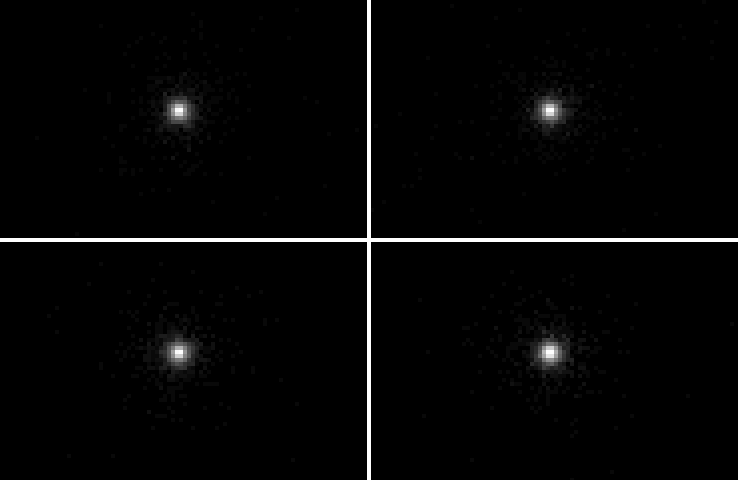

In [82]:
ds9 marx_sim.psf -scale log -pan to 4105.5 4113.5 physical \
  -zoom to 4 \
  marxA_sim.psf -pan to 4105.5 4113.5 physical \
  marxB_sim.psf -pan to 4105.5 4113.5 physical \
  marxC_sim.psf -pan to 4105.5 4113.5 physical \
  -view colorbar no \
  -saveimage png ds9_exercise15_ec1.png -quit 

display < ds9_exercise15_ec1.png
  

Run the Lucy-Richardson deconvolution tool arestore using the broad band flux image and the PSFs simulated here.  Try with different numbers of iterations.

In [83]:
arestore "acisf13858_broad_thresh.img[sky=bounds(region(ds9_bkg.reg))]" \
  chart_sim.psf arestore.out num=150 clob+ 


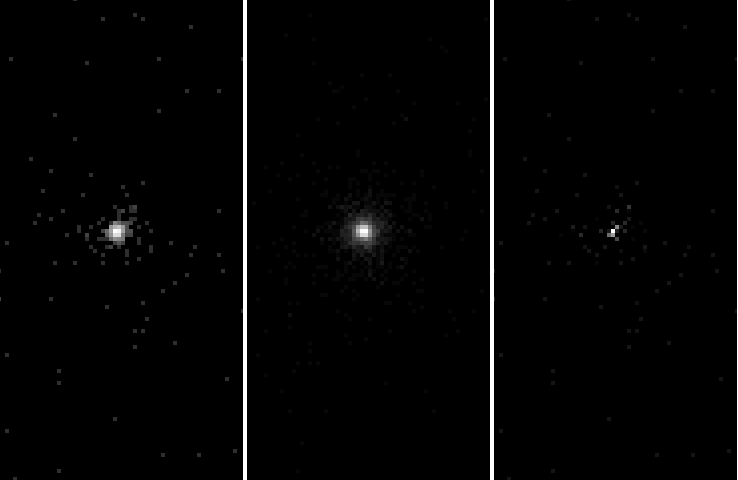

In [84]:
ds9 acisf13858_broad_thresh.img -scale log -pan to 4105.5 4113.5 physical \
  -zoom to 4 \
  chart_sim.psf -pan to 4105.5 4113.5 physical \
  arestore.out  -pan to 4105.5 4113.5 physical  \
  -view colorbar no \
  -tile mode column \
  -saveimage png ds9_exercise15_ec2.png -quit 

display < ds9_exercise15_ec2.png
  

### Create a 3-color image

Three color (aka "true color" or "tri-color") images can be useful to help guide analysis by providing visual clues about changes in spectra.



#### Exercise 16


1. Obtain the data for OBS_ID 13736.  These data will only be used for this exercise.
2. Reprocess the data using chandra_repro
3. Run fluximage on the reprocessed level 2 event file.  Use binsize=8 and bands=csc.
4. Load the soft, medium, and hard band flux.img images into ds9.  This can be done in the GUI by creating a new RGB frame and then loading the files individually or on the command line
```bash
ds9 -rgb -red root_soft_flux.img \
  -green root_medium_flux.img \
  -blue root_hard_flux.img 
```
5. Log scale each of the images.
6. Use the Analysis → Smooth on each of the images.
7. Save the image in PNG format. 
8. Exit ds9
9. Use dmimg2jpg to create a similar 3-color image.



In [85]:
/bin/rm -rf 13736
download_chandra_obsid 13736 evt1,bpix,flt,mtl,msk,dtf,bias,pbk,asol,stat


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  bpix     fits       78 Kb  ####################          < 1 s  1227.4 kb/s
  asol     fits       27 Mb  ####################          < 1 s  50398.3 kb/s
  evt1     fits      286 Mb  ####################            5 s  56549.9 kb/s
  flt      fits        7 Kb  ####################          < 1 s  211.7 kb/s
  msk      fits        5 Kb  ####################          < 1 s  721.0 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  22225.8 kb/s
  stat     fits        3 Mb  ####################          < 1 s  6461.6 kb/s
  bias     fits      487 Kb  ####################          < 1 s  1003.2 kb/s
  bias     fits      429 Kb  ####################          < 1 s  3927.1 kb/s
  bias     fits      425 Kb  ####################          < 1 s  13146.4 kb/s
  bias     fits      436 Kb  ####################          < 

In [86]:
download_obsid_caldb 13736 ./CALDB

download_obsid_caldb
          infile = 13736
          outdir = ./CALDB
      background = no
         missing = no
         clobber = no
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.7.9
Retrieving CALDB index files
Processing infile=13736/secondary/acisf13736_000N001_evt1.fits.gz
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23skyN0002.fits             .................... (skipped)
    telD1999-07-23tdetN0001.fits            .................... (skipped)
    telD1999-07-23geomN0006.fits            .................... (skipped)
    telD1999-07-23sgeomN0001.fits           .................... (skipped)
    telD1999-07-23aimptsN0002.fits          .................... (skipped)
    hrmaD1996-12-20axeffaN0008.fits         .................... (skipped)
    hrmaD1996-12-20vignetN0003.fits         .................... (skipped)
    acisD2010-02-01qeuN0007.fits            .................... 

In [87]:
chandra_repro 13736 out= 


Processing input directory '/data/lenin2/Conf_and_Work/CIAO_Workshop_2018/13736'

Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/13736/repro/acisf13736_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/13736/repro/acisf13736_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new products in


In [88]:
fluximage 13736 out=tricolor band=csc bin=8 clob+

Running fluximage
Version: 12 September 2016

Found 13736/repro/acisf13736_repro_evt2.fits
Using event file 13736/repro/acisf13736_repro_evt2.fits
Using CSC ACIS soft science energy band.
Using CSC ACIS medium science energy band.
Using CSC ACIS hard science energy band.
Aspect solution 13736/repro/pcadf444947551N001_asol1.fits found.
Bad-pixel file 13736/repro/acisf13736_repro_bpix1.fits found.
Mask file 13736/repro/acisf13736_000N001_msk1.fits found.

The output images will have 304 by 394 pixels, pixel size of 3.936 arcsec,
    and cover x=3568.5:6000.5:8,y=2840.5:5992.5:8.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 13736
Creating 15 instrument maps for obsid 13736
Creating 15 exposure maps for obsid 13736
Combining 5 exposure maps for 3 bands (obsid 13736)
Thresholding data for obsid 13736
Exposure-correcting 3 images for obsid 13736

The following files were created:

 The clipped counts images are:
     tricolor_soft_thresh.img
     tricolo

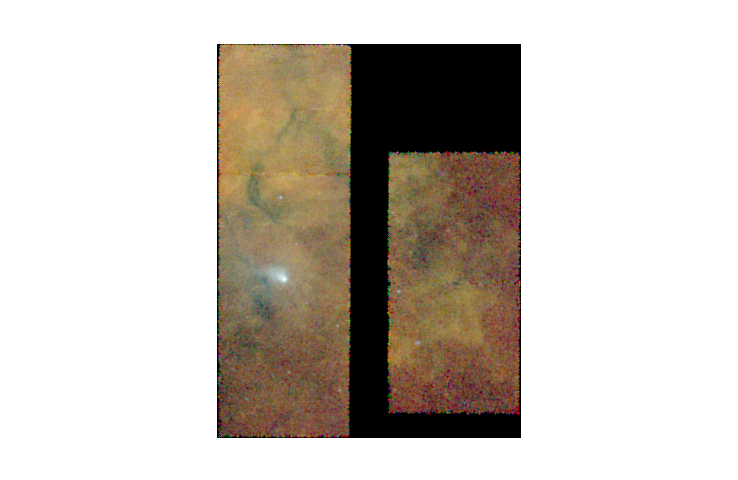

In [89]:
ds9 -rgb -view colorbar no \
  -red tricolor_soft_flux.img -scale log -smooth yes -smooth radius 1 \
  -green tricolor_medium_flux.img -scale log -smooth yes -smooth radius 1 \
  -blue tricolor_hard_flux.img -scale log -smooth yes -smooth radius 1 \
  -saveimage png ds9_exercise_16.png -quit

display < ds9_exercise_16.png

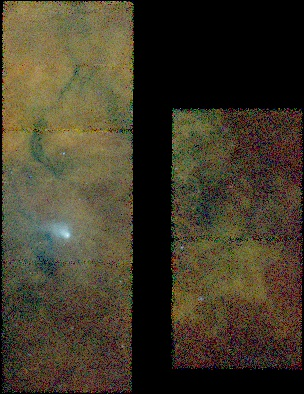

In [90]:
dmimg2jpg \
  infile=tricolor_soft_flux.img \
  greenfile=tricolor_medium_flux.img \
  bluefile=tricolor_hard_flux.img \
  outfile=dmimg2jpg_exercise13.jpg \
  clob+

display < dmimg2jpg_exercise13.jpg

> Q: Discuss the differences in the output from ds9 and dmimg2jpg.  **ds9 interactive**


#### Extra Credit

Smooth the images with aconvolve before displaying

In [91]:
# Should convolve image and exposure map separately!

aconvolve tricolor_soft_flux.img tricolor_soft_flux_gaus.img "lib:gaus(2,5,1,1,1)" meth=slide clob+
aconvolve tricolor_medium_flux.img tricolor_medium_flux_gaus.img "lib:gaus(2,5,1,1,1)" meth=slide clob+
aconvolve tricolor_hard_flux.img tricolor_hard_flux_gaus.img "lib:gaus(2,5,1,1,1)" meth=slide clob+



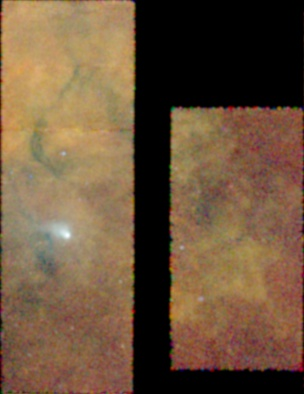

In [92]:
dmimg2jpg \
  infile=tricolor_soft_flux_gaus.img \
  greenfile=tricolor_medium_flux_gaus.img \
  bluefile=tricolor_hard_flux_gaus.img \
  outfile=dmimg2jpg_exercise13_aconvolve.jpg \
  clob+

display < dmimg2jpg_exercise13_aconvolve.jpg

Smooth the images with csmooth before displaying

In [93]:
# Csmooth really, really wants integer counts, so we smooth the counts image not the flux'ed image.

csmooth tricolor_soft_thresh.img none tricolor_soft_flux_csm.img sigmin=3 sclmax=20 mode=h clob+ 
csmooth tricolor_medium_thresh.img none tricolor_medium_flux_csm.img sigmin=3 sclmax=20 mode=h clob+
csmooth tricolor_hard_thresh.img none tricolor_hard_flux_csm.img sigmin=3 sclmax=20 mode=h clob+


# WARNING: Remainder will be smoothed on scale of 20.000000
# WARNING: Remainder will be smoothed on scale of 20.000000
# WARNING: Remainder will be smoothed on scale of 20.000000


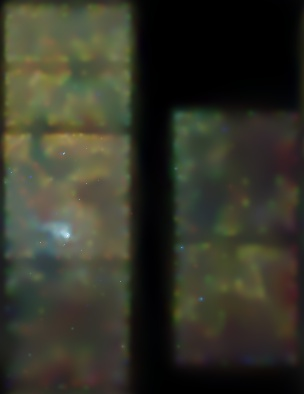

In [94]:
dmimg2jpg \
  infile=tricolor_soft_flux_csm.img \
  greenfile=tricolor_medium_flux_csm.img \
  bluefile=tricolor_hard_flux_csm.img \
  outfile=dmimg2jpg_exercise13_csm.jpg \
  clob+

display < dmimg2jpg_exercise13_csm.jpg


Smooth the images with dmimgadapt before displaying

In [95]:
dmimgadapt tricolor_soft_thresh.img tricolor_soft_flux_cone.img cone min=1 max=20 num=100 radscale=linear counts=25 clob+ mode=h
dmimgadapt tricolor_medium_thresh.img tricolor_medium_flux_cone.img min=1 max=20 num=100 radscale=linear counts=25 clob+ mode=h
dmimgadapt tricolor_hard_thresh.img tricolor_hard_flux_cone.img min=1 max=20 num=100 radscale=linear counts=25 clob+ mode=h


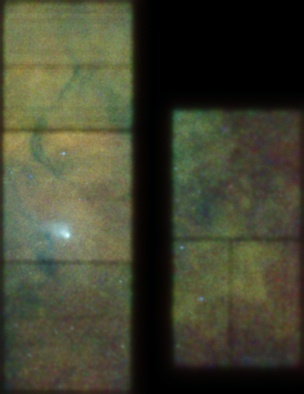

In [96]:
dmimg2jpg \
  infile=tricolor_soft_flux_cone.img \
  greenfile=tricolor_medium_flux_cone.img \
  bluefile=tricolor_hard_flux_cone.img \
  outfile=dmimg2jpg_exercise13_cone.jpg \
  clob+

display < dmimg2jpg_exercise13_cone.jpg


Obtain overlapping multi-spectral images of this region from other archives. Use reproject_image to project the other datasets to the same tangent plane as the Chandra dataset.  Create tri-color image using red for the lowest energy, and blue for the highest energy datasets.

Obtain the data for OBS_ID 635 and reprocess it with chandra_repro.  Split the event file into 3 equal time intervals by filtering on the TIME column.  Run fluximage on each time interval using the broad energy band.  Use the 3 time-slices to create a 3 color image. 

In [97]:
/bin/rm -rf 635
download_chandra_obsid 635 evt1,bpix,flt,mtl,msk,dtf,bias,pbk,asol,stat


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  bpix     fits       81 Kb  ####################          < 1 s  1982.9 kb/s
  asol     fits       26 Mb  ####################            1 s  18076.5 kb/s
  evt1     fits      173 Mb  ####################            4 s  48320.7 kb/s
  flt      fits        7 Kb  ####################          < 1 s  295.2 kb/s
  msk      fits        5 Kb  ####################          < 1 s  725.9 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  18932.2 kb/s
  stat     fits        3 Mb  ####################          < 1 s  17501.7 kb/s
  bias     fits      423 Kb  ####################          < 1 s  2691.3 kb/s
  bias     fits      435 Kb  ####################          < 1 s  5529.3 kb/s
  bias     fits      433 Kb  ####################          < 1 s  11152.1 kb/s
  bias     fits      426 Kb  ####################          <

In [98]:
download_obsid_caldb 635 ./CALDB

download_obsid_caldb
          infile = 635
          outdir = ./CALDB
      background = no
         missing = no
         clobber = no
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.7.9
Retrieving CALDB index files
Processing infile=635/secondary/acisf00635_000N004_evt1.fits.gz
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23geomN0006.fits            .................... (skipped)
    telD1999-07-23aimptsN0002.fits          .................... (skipped)
    telD1999-07-23sgeomN0001.fits           .................... (skipped)
    telD1999-07-23tdetN0001.fits            .................... (skipped)
    telD1999-07-23skyN0002.fits             .................... (skipped)
    hrmaD1996-12-20axeffaN0008.fits         .................... (skipped)
    acisD2000-01-29badpixN0003.fits         ####################
    hrmaD1996-12-20vignetN0003.fits         .................... (skipped)
    

In [99]:
chandra_repro 635 out=


Processing input directory '/data/lenin2/Conf_and_Work/CIAO_Workshop_2018/635'

Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/635/repro/acisf00635_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /data/lenin2/Conf_and_Work/CIAO_Workshop_2018/635/repro/acisf00635_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new products in
/data/lenin2/Conf_and_Work/CIAO_Workshop_2018/635/repro



In [100]:
dmstat "635/repro/acisf00635_repro_evt2.fits[cols time]" cen- sig- med-

time[s]
    min:	72039166.717 	      @:	1 
    max:	72141141.711 	      @:	454807 
   mean:	72091533.863 
    sum:	3.2787806333e+13 
   good:	454808 
   null:	0 



In [101]:
python -c 'a=72039166;b=72141142;dt3=(b-a)/3.0;print(a+0.0*dt3,a+1.0*dt3,a+2.0*dt3,a+3.0*dt3)'

72039166.0 72073158.0 72107150.0 72141142.0


In [102]:
dmcopy "635/repro/acisf00635_repro_evt2.fits[time=72039166.0:72073158.0]" 635/repro/begin_evt.fits clob+
dmcopy "635/repro/acisf00635_repro_evt2.fits[time=72073158.0:72107150.0]" 635/repro/middle_evt.fits clob+
dmcopy "635/repro/acisf00635_repro_evt2.fits[time=72107150.0:72141142.0]" 635/repro/end_evt.fits clob+

In [103]:
fluximage 635/repro/begin_evt.fits rhooph_begin bin=6 band=broad clob+ verb=0
fluximage 635/repro/middle_evt.fits rhooph_middle bin=6 band=broad clob+ verb=0
fluximage 635/repro/end_evt.fits rhooph_end bin=6 band=broad clob+  verb=0

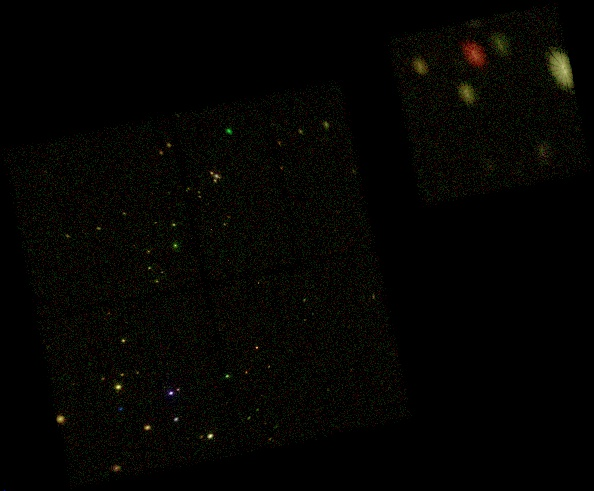

In [104]:
dmimg2jpg \
  infile=rhooph_begin_broad_thresh.img \
  greenfile=rhooph_middle_broad_thresh.img \
  bluefile=rhooph_end_broad_thresh.img \
  outfile=rhooph_time_slice.jpg \
  clob+

display < rhooph_time_slice.jpg


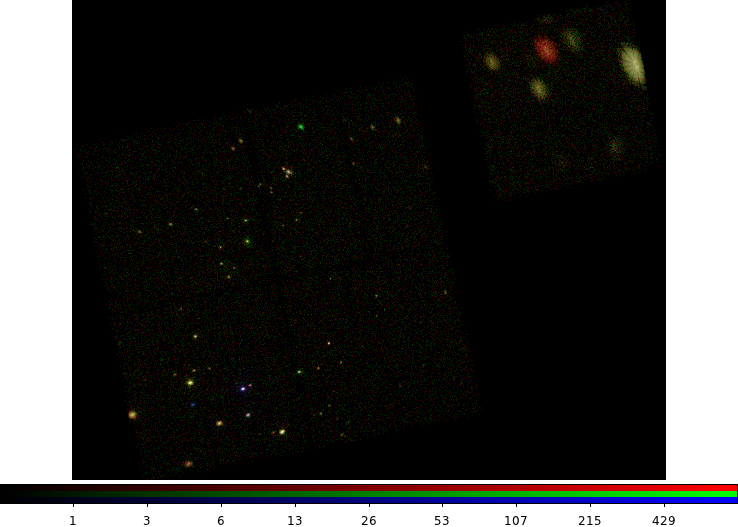

In [105]:
e=635/repro/acisf00635_repro_evt2.fits
f=635/repro/acisf00635_repro_fov1.fits
dmcopy "${e}[sky=region($f),energy=500:7000][bin sky=6,time=::#3]" 635_time_cube.fits clob+

ds9 -scale log -rgbcube 635_time_cube.fits -saveimage ds9_ex16_timecube.png -quit
display < ds9_ex16_timecube.png


## Timing Analysis 

References
- http://cxc.cfa.harvard.edu/ciao/threads/timing.html

CIAO provides several tools to perform basic timing analysis.




### Extract Light Curve


References: 
- http://cxc.cfa.harvard.edu/ciao/threads/lightcurve/
- http://cxc.cfa.harvard.edu/ciao/threads/variable/
- http://cxc.cfa.harvard.edu/ciao/why/lightcurve.html

In X-ray astronomy the term "light curve" is used to describe the flux of a source vs time.




#### Exercise 17

1. Create a light curve using the dmextract tool with the reprocessed level 2 event file filtered with the source and background regions created in Exercise 11 steps 3 and 6. Use a 100 second bin width: [bin time=::100].
2. Repeat 1, using the following bin widths:  200, 500, 1000, 1.
3. Plot each of the light curves using `chips`.
```python
chips> make_figure("out_bin100.lc[cols dt,count_rate]")
chips> print_window("out_bin100.png")
```




In [106]:
dmextract 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10),energy=500:7000][bin time=::100]" \
  out=dme_100s.lc op=ltc1 \
  bkg=13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg),energy=500:7000]" \
  mode=h clob+

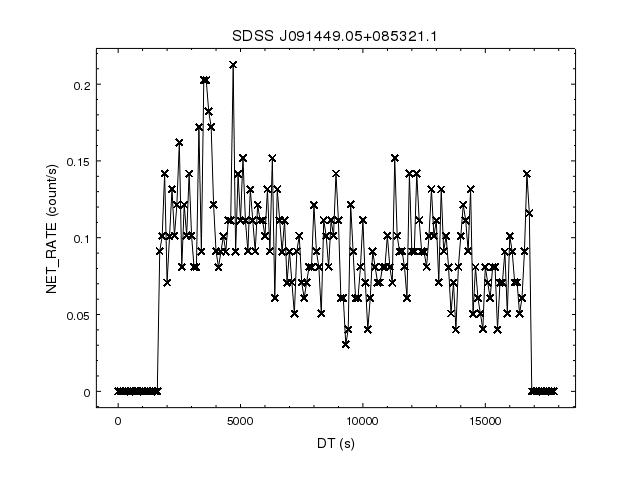

In [107]:
cat << EOM > chips_ex17a.py 
make_figure("dme_100s.lc[cols dt,net_rate]")
print_window("out_bin100.png","export.clobber=True")
quit()
EOM

chips -n chips_ex17a.py 
display < out_bin100.png

In [108]:
for tt in  200 500 1000 1
do

dmextract 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10),energy=500:7000][bin time=::${tt}]" \
  out=dme_${tt}s.lc op=ltc1 \
  bkg=13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg),energy=500:7000]" \
  mode=h clob+

done


# dmextract (CIAO 4.10): WARNING: Binning size=1 smaller than TIMEDEL=3.14104

# dmextract (CIAO 4.10): WARNING: Binning size=1 smaller than TIMEDEL=3.14104



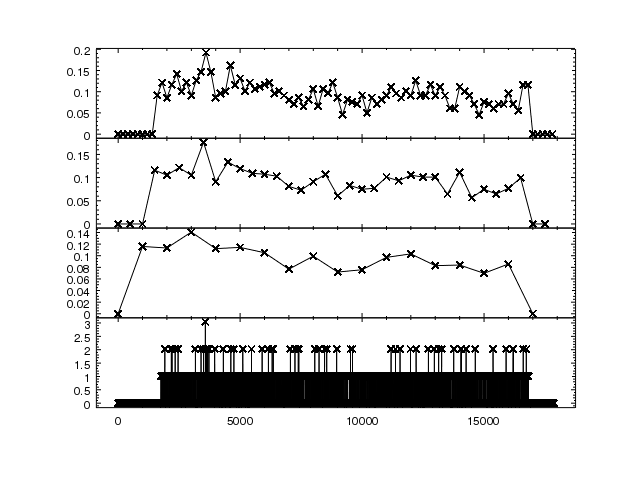

In [109]:
cat << EOM > chips_ex17b.py 
strip_chart(4)
set_current_plot("plot1")
add_curve("dme_200s.lc[cols dt,net_rate]")
set_current_plot("plot2")
add_curve("dme_500s.lc[cols dt,net_rate]")
set_current_plot("plot3")
add_curve("dme_1000s.lc[cols dt,net_rate]")
set_current_plot("plot4")
add_curve("dme_1s.lc[cols dt,net_rate]")
print_window("out_bin_strip.png","export.clobber=True")
quit()
EOM

chips -n chips_ex17b.py 
display < out_bin_strip.png

In [110]:
dmlist dme_100s.lc cols

 
--------------------------------------------------------------------------------
Columns for Table Block LIGHTCURVE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   TIME_BIN             channel      Int4           1:179                S/C TT corresponding to mid-exposure
   2   TIME_MIN             s            Real8          456518974.4871399999:456536836.1380900145 Minimum Value in Bin
   3   TIME                 s            Real8          456518974.4871399999:456536836.1380900145 S/C TT corresponding to mid-exposure
   4   TIME_MAX             s            Real8          456518974.4871399999:456536836.1380900145 Maximum Value in Bin
   5   COUNTS               count        Int4           -                    Counts
   6   STAT_ERR             count        Real8          0:+Inf               Statistical error
   7   AREA                 pixel**2     Real8          -Inf:+Inf     

In [111]:
dmlist 13858/repro/acisf13858_repro_evt2.fits blocks,subspace

 
--------------------------------------------------------------------------------
Dataset: 13858/repro/acisf13858_repro_evt2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: EVENTS                         Table        16 cols x 134868   rows
Block    3: GTI7                           Table         2 cols x 1        rows
Block    4: GTI5                           Table         2 cols x 1        rows
Block    5: GTI6                           Table         2 cols x 1        rows
Block    6: GTI8                           Table         2 cols x 1        rows
 
--------------------------------------------------------------------------------
Data subspace for block EVENTS: Components: 4 Descriptors: 16 
--------------------------------------

> Q: Why is there a gap at the beginning and at the end of the light curves with count_rate=0? **outside of GTI but inside of TSTART-TSTOP**

> Q: Is the delta-time, dt, column actually a column in the dmextract output file? **No, it's a coord on time column**

> Q: What can be learned from the light curve with 1 second time resolution? **nothing**

> Q: What energy events were used to make these light curves?  Does using an energy filter change things and if so how?
**used energy=500:7000, if not then would have used all energies **

> Q: ACIS event files contain multiple good time intervals (one for each chip).  Which GTI was use?    **The first one, which in this case is for CCD=7 which is correct**


#### Exercise 18


1. Create a light curve using the glvary tool using the reprocessed level 2 event file with the source region.
2. Repeat 1 using the background region.
3. Plot the glvary source and background lightcurves using chips



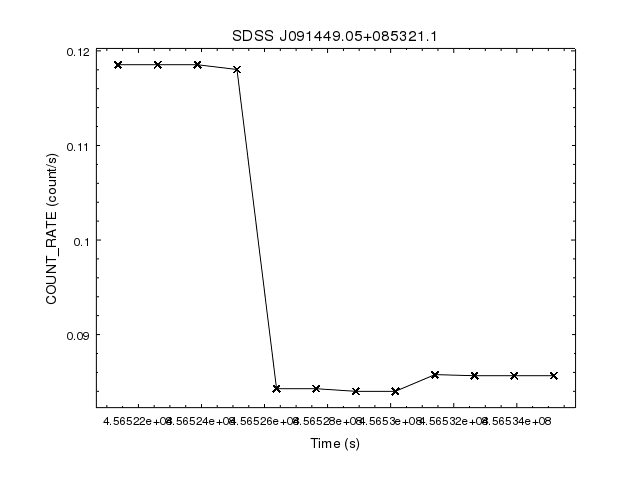

In [112]:
glvary 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10),energy=500:7000]" \
  out=glvary_src.prob lc=glvary_src.lc clob+ mode=h

cat << EOM > chips_ex18a.py
make_figure("glvary_src.lc[cols time,count_rate]")
print_window("glvary_src.png","export.clobber=True")
quit()
EOM


chips -n chips_ex18a.py
display < glvary_src.png

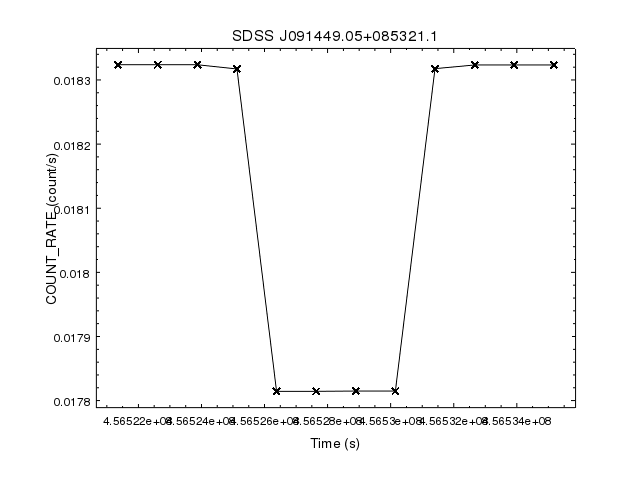

In [113]:
glvary 13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg),energy=500:7000]" \
  out=glvary_bkg.prob lc=glvary_bkg.lc clob+ mode=h

cat << EOM > chips_ex18b.py
make_figure("glvary_bkg.lc[cols time,count_rate]")
print_window("glvary_bkg.png","export.clobber=True")
quit()
EOM

chips -n chips_ex18b.py
display < glvary_bkg.png

> Q: Describe how the glvary lightcurves differ from the dmextract light curves. 
**it picked binning, no `dt` column.  No net-rate**


> Q: Could any variability in the source region be due to variability in the background?  **No variability, background is not variable either**



#### Extra Credit

Use the dither_region tool to compute the time resolved area fraction of the source and separately the background regions.  Try using those as input to dmextract and glvary as exposure corrections.  Compare to the results without those corrections.

In [114]:
punlearn ardlib
acis_set_ardlib 13858/repro/acisf13858_repro_bpix1.fits abs-

Updated ardlib parameter file: /home/kjg/cxcds_param4/ardlib.par
  AXAF_ACIS0_BADPIX_FILE -> CALDB
  AXAF_ACIS1_BADPIX_FILE -> CALDB
  AXAF_ACIS2_BADPIX_FILE -> CALDB
  AXAF_ACIS3_BADPIX_FILE -> CALDB
  AXAF_ACIS4_BADPIX_FILE -> CALDB
  AXAF_ACIS5_BADPIX_FILE -> 13858/repro/acisf13858_repro_bpix1.fits[BADPIX5]
  AXAF_ACIS6_BADPIX_FILE -> 13858/repro/acisf13858_repro_bpix1.fits[BADPIX6]
  AXAF_ACIS7_BADPIX_FILE -> 13858/repro/acisf13858_repro_bpix1.fits[BADPIX7]
  AXAF_ACIS8_BADPIX_FILE -> 13858/repro/acisf13858_repro_bpix1.fits[BADPIX8]
  AXAF_ACIS9_BADPIX_FILE -> CALDB


In [115]:
dither_region \
  13858/repro/pcadf456520092N001_asol1.fits \
  "circle(4104.5,4115.5,10)" \
  dr_src.out \
  wcs= 13858/repro/acisf13858_repro_evt2.fits \
  mask= 13858/repro/acisf13858_000N001_msk1.fits \
  mode=h clob+

In [116]:
dmlist dr_src.out cols

 
--------------------------------------------------------------------------------
Columns for Table Block AREAFRACTION
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   TIME                 s            Real8          456520092.2497000098:456535804.9880300164 Time
   2   EQPOS(RA,DEC)        deg          Real8          -360.0:      360.0   Sky Position
   3   ROLL                 deg          Real8          -Inf:+Inf            Roll angle
   4   FRACAREA                          Real8          -Inf:+Inf            Fraction area
   5   AREA_CHIP_FRAC[10]                Real8(10)      -Inf:+Inf            Region Area Fraction per chip
   6   DELTA_T              s            Real8          -Inf:+Inf            Time
   7   CHIP_FRAC_TIME[10]                Real8(10)      -Inf:+Inf            Fraction of ontime per chip
   8   STATUS                            Bit[8]                     

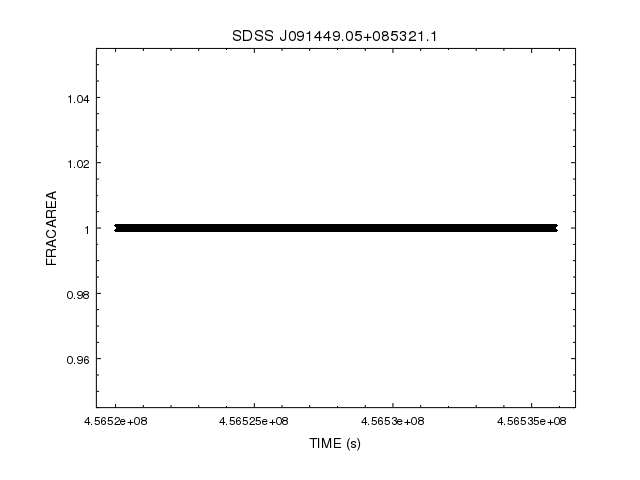

In [117]:
cat << EOM > chips_ex18_drout.py
make_figure("dr_src.out[cols time,fracarea]")
print_window("dr_src.png","export.clobber=True")
quit()
EOM

chips -n chips_ex18_drout.py
display < dr_src.png

In [118]:
dither_region \
  13858/repro/pcadf456520092N001_asol1.fits \
  "region(ds9_bkg.reg)" \
  dr_bkg.out \
  wcs= 13858/repro/acisf13858_repro_evt2.fits \
  mask= 13858/repro/acisf13858_000N001_msk1.fits \
  mode=h clob+ maxpix=10000

# dither_region (CIAO 4.10): WARNING: Too many pixels, resetting resolution from 1.000000e+00 to 2.000000e+00

# dither_region (CIAO 4.10): WARNING: Too many pixels, resetting resolution from 2.000000e+00 to 3.000000e+00



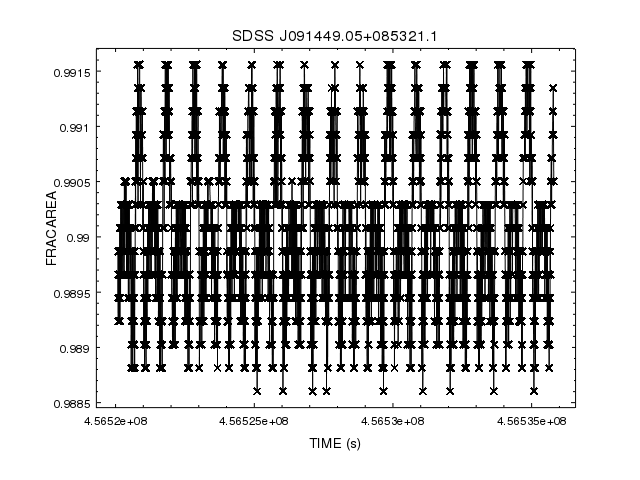

In [119]:
cat << EOM > chips_ex18_droutb.py
make_figure("dr_bkg.out[cols time,fracarea]")
print_window("dr_bkg.png","export.clobber=True")
quit()
EOM

chips -n chips_ex18_droutb.py
display < dr_bkg.png

> The background is dither across bad columns/pixels, but only a tiny fraction of the area is lost.


### Check for background flares

Reference:  
- http://cxc.cfa.harvard.edu/ciao/threads/flare/

Background flares may influence results especially when working with large source regions such as supernovae remnants or clusters.

For an on-axis point source, users should carefully consider whether excluding time due to a background flare would be better than accepting the time in order to obtain higher signal to noise.





#### Exercise 19

In this exercise, students will extract a light curve for a background, source-free region and use it to search for any evidence of a background flare.

1. Using dmcoords, dmstat, dmlist, or ds9+dax, determine the CCD_ID where the bright source in the center of the field is located.
2. Use dmcopy to exclude the wavdetect sources detected in Exercise 10 step 3 from 
the reprocessed Level 2 event file.
3. Use dmextract to create a light curve using the source free event file, use a CCD_ID filter to select events from chip you found in step 1.  Use a bin-width of 259.28 seconds.
4. Use the deflare tool to search for background flares on the source chip using method=clean.
5. Use dmcopy to apply the deflare output good-time interval, GTI, file to the reprocessed level 2 event file.



In [120]:
punlearn dmcoords
dmcoords 13858/repro/acisf13858_repro_evt2.fits op=sky x=4104.5 y=4115.5 verb=0 
pget dmcoords x y ra dec chip_id chipx chipy

4104.5
4115.5
09:14:49.087
+08:53:21.00
7
207.3356406343804
517.7142405898469


In [121]:
python -c 'from region import *;wav=CXCRegion("acisf13858_wav.src");out=field()-wav;out.write("exclude.reg",fits=True, clobber=True)'
dmcopy 13858/repro/acisf13858_repro_evt2.fits"[sky=region(exclude.reg)]" 13858_evt.holes clob+

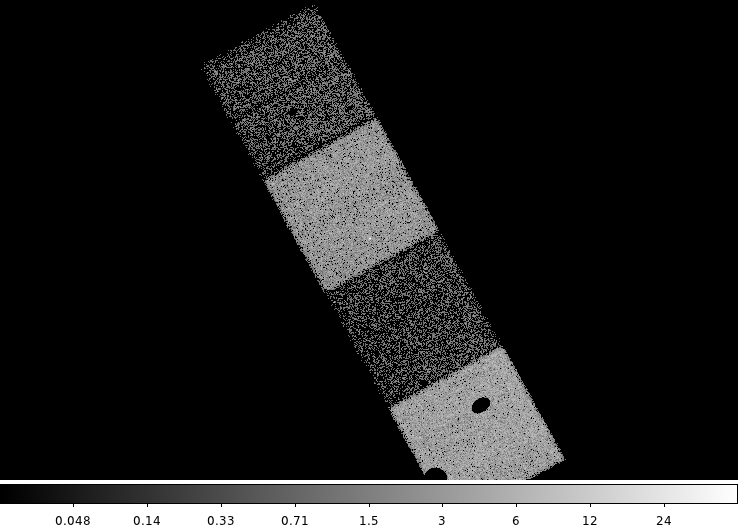

In [122]:
ds9 13858_evt.holes -scale log -bin factor 8 -saveimage png ds9_ex19.png -quit 
display < ds9_ex19.png 

In [123]:
dmextract 13858_evt.holes'[ccd_id=7][bin time=::259.28]' bkg_lc op=ltc1 clob+

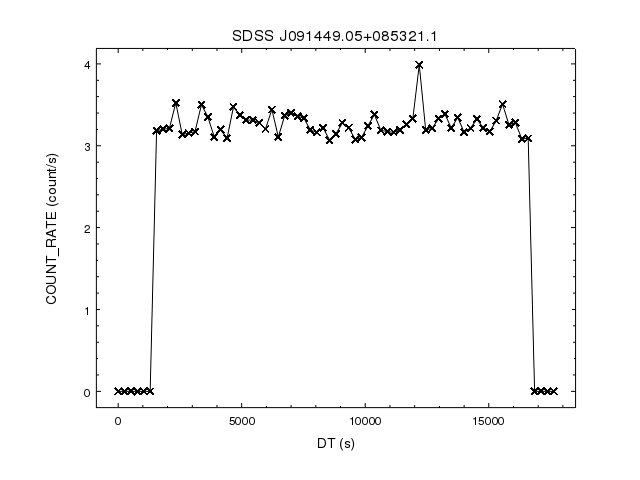

In [124]:
cat << EOM > chips_ex19.py 
make_figure("bkg_lc[cols dt,count_rate]")
print_window("chips_ex19.png","export.clobber=True")
quit()
EOM

chips -n chips_ex19.py
display < chips_ex19.png

Parameters used to clean the lightcurve are:
  script version = May 2017
  mean           = None
  clip           = 3
  scale          = 1.2
  minfrac        = 0.1
  outfile        = bkg_lc_flare
  plot           = True
  rateaxis       = y
  color          = green
  pattern        = solid
  pattern color  = red

Total number of bins in lightcurve   = 69
Max length of one bin                = 255.892 s
Num. bins with a smaller exp. time   = 2
Num. bins with exp. time = 0         = 10
Number of bins with a rate of 0 ct/s = 10

Calculated an initial mean (sigma-clipped) rate of 3.25061 ct/s
Lightcurve limits use a scale factor of 1.2 about this mean
Filtering lightcurve between rates of 2.70884 and 3.90073 ct/s
Number of good time bins = 58
Rate filter:  2.7088414284775522 <= count_rate < 3.9007316570076744 
Mean level of filtered lightcurve = 3.2506097141730623 ct/s

GTI limits calculated using a count-rate filter:
  (count_rate>2.7088414284775522 && count_rate<3.9007316570076744)

The 

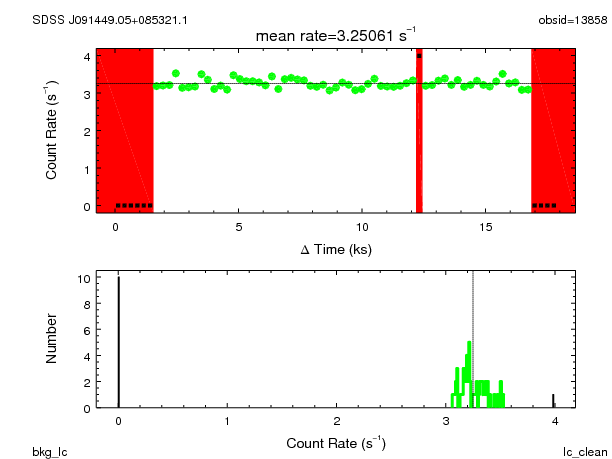

In [125]:
deflare bkg_lc bkg_lc_flare method=clean save="bkg_lc_flare"

convert bkg_lc_flare.ps -trim bkg_lc_flare.png
display < bkg_lc_flare.png

In [126]:
dmcopy 13858/repro/acisf13858_repro_evt2.fits"[@bkg_lc_flare]" 13858_deflare.evt clob+

In [127]:
dmlist 13858/repro/acisf13858_repro_evt2.fits counts
dmlist 13858_deflare.evt counts

134868  
132340  


> Q:  What CCD_ID was found in step 1?  Which tool(s) were used?   **chip 7, `dmcoords`**


> Q: Was there any evidence of a background flare in this observation, on this chip?  If so, describe the flare (when did it occur within the observation, duration, etc.):  **Yes, a very short 1-time-bin duration fare in the 2nd half of the
observation **


#### Extra Credit

Try different bin-widths when creating the light curve.  Does it affect the results?

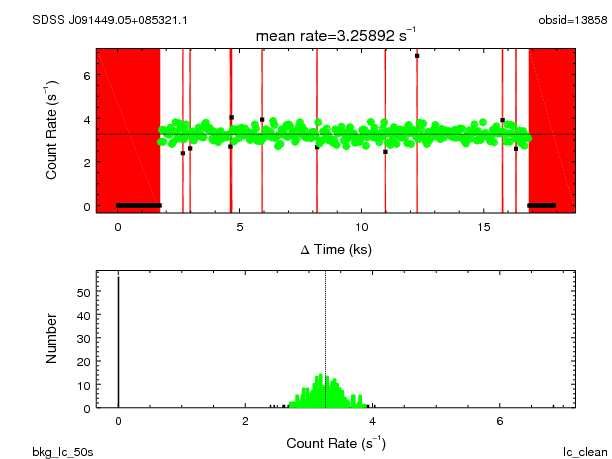

In [128]:
dmextract 13858_evt.holes'[ccd_id=7][bin time=::50]' bkg_lc_50s op=ltc1 clob+

deflare bkg_lc_50s bkg_lc_flare_50s method=clean save="bkg_lc_flare_50s" plot- verb=0

convert bkg_lc_flare_50s.ps -trim bkg_lc_flare50s.png
display < bkg_lc_flare50s.png

Try different deflare method options.  

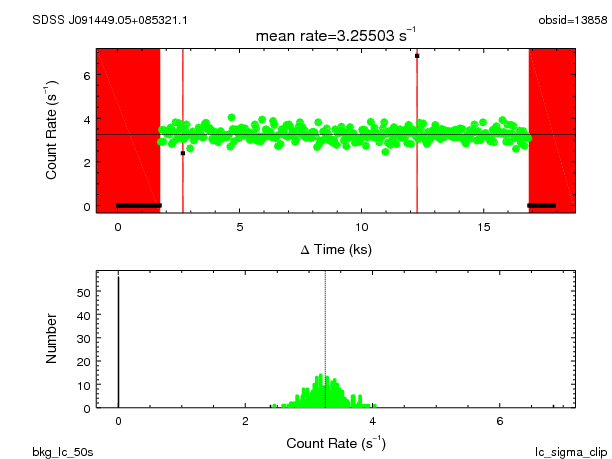

In [129]:
deflare bkg_lc_50s bkg_lc_sigmaclip_50s method=sigma save="bkg_lc_sigmaclip_50s" plot- verb=0 < /dev/null

convert bkg_lc_sigmaclip_50s.ps -trim bkg_lc_sigmaclip50s.png
display < bkg_lc_sigmaclip50s.png

Try looking for flares on the other CCD's used in this observation.

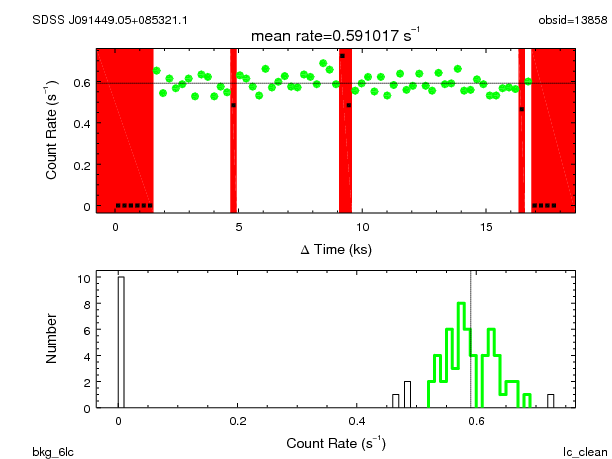

In [130]:
dmextract 13858_evt.holes'[ccd_id=6][bin time=::259]' bkg_6lc op=ltc1 clob+

deflare bkg_6lc bkg_6lc_flare method=clean save="bkg_6lc_flare" plot- verb=0

convert bkg_6lc_flare.ps -trim bkg_6lc_flare.png
display < bkg_6lc_flare.png

## Spectral Analysis

The energy resolution and sensitivity of the ACIS detector allows for spectral analysis roughly in the 0.3 to 7.0 keV range.   



### Extract Spectra

Reference
- http://cxc.harvard.edu/ciao/threads/pointlike/



#### Exercise 20


In this exercise Students will use the specextract tool to extract the spectrum, ARF, and RMF files for the source and background regions.

1. Run the specextract script using the reprocessed level 2 event file with the source region from Exercise 11 step 3 and the background region from step 6 with the default parameter settings.
2. Run specextract as in step 1 with a different outroot and setting weight=no
3. Run specextract as in step 2 with a different outroot and setting correctpsf=yes
4. Use dmdiff to compare the spectra (.pi) from steps 2 and 3 to the spectrum in step 1.
5. Use dmdiff to compare the auxiliary response file (.arf) from steps 2 and 3 to the ARF in step 1.
6. Use dmlist to get the BACKSCAL and EXPOSURE keywords from the source and background spectra.




In [131]:
punlearn specextract 

specextract 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10)]" \
  out=specextract_01 \
  bkgfile=13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg)]" \
  mode=h clob+

Running specextract
Version: 11 May 2018

Checking for blank sky background files...
Using event file 13858/repro/acisf13858_repro_evt2.fits[sky=circle(4104.5,4115.5,10)]

Aspect solution file 13858/repro/pcadf456520092N001_asol1.fits found.

Bad-pixel file 13858/repro/acisf13858_repro_bpix1.fits found.

Mask file 13858/repro/acisf13858_000N001_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Creating src RMF 

Using mkacisrmf...

Grouping src spectrum 

Updating header of specextract_01.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_01_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Creating bkg ARF 

Creating bkg RMF 

Using mkacisrmf...

Updating header of specextract_01_bkg.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_01.pi with BACKFILE keyword.

Updating header of specextract_01_grp.pi with BACKFILE keyword.



In [132]:
punlearn specextract 

specextract 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10)]" \
  out=specextract_02 \
  bkgfile=13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg)]" \
  weight=no \
  mode=h clob+

Running specextract
Version: 11 May 2018

Checking for blank sky background files...
Using event file 13858/repro/acisf13858_repro_evt2.fits[sky=circle(4104.5,4115.5,10)]

Aspect solution file 13858/repro/pcadf456520092N001_asol1.fits found.

Bad-pixel file 13858/repro/acisf13858_repro_bpix1.fits found.

Mask file 13858/repro/acisf13858_000N001_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Creating src RMF 

Using mkacisrmf...

Grouping src spectrum 

Updating header of specextract_02.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_02_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Creating bkg ARF 

Creating bkg RMF 

Using mkacisrmf...

Updating header of specextract_02_bkg.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_02.pi with BACKFILE keyword.

Updating header of specextract_02_grp.pi with BACKFILE keyword.



In [133]:
punlearn specextract 

specextract 13858/repro/acisf13858_repro_evt2.fits"[sky=circle(4104.5,4115.5,10)]" \
  out=specextract_03 \
  bkgfile=13858/repro/acisf13858_repro_evt2.fits"[sky=region(ds9_bkg.reg)]" \
  correctpsf=yes \
  mode=h clob+ 

Running specextract
Version: 11 May 2018

Checking for blank sky background files...
Using event file 13858/repro/acisf13858_repro_evt2.fits[sky=circle(4104.5,4115.5,10)]

Aspect solution file 13858/repro/pcadf456520092N001_asol1.fits found.

Bad-pixel file 13858/repro/acisf13858_repro_bpix1.fits found.

Mask file 13858/repro/acisf13858_000N001_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Creating src RMF 

Using mkacisrmf...

Grouping src spectrum 

Updating header of specextract_03.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_03_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Creating bkg ARF 

Creating bkg RMF 

Using mkacisrmf...

Updating header of specextract_03_bkg.pi with RESPFILE and ANCRFILE keywords.

Updating header of specextract_03.pi with BACKFILE keyword.

Updating header of specextract_03_grp.pi with BACKFILE keyword.



In [134]:
/bin/ls specextra*pi

specextract_01.pi      specextract_02.pi      specextract_03.pi
specextract_01_bkg.pi  specextract_02_bkg.pi  specextract_03_bkg.pi
specextract_01_grp.pi  specextract_02_grp.pi  specextract_03_grp.pi


In [135]:
dmdiff specextract_01.pi specextract_02.pi || echo

Infile 1:  specextract_01.pi
Infile 2:  specextract_02.pi

-----------------------
HEADER VALUE DIFFERENCES
-----------------------


Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not equal                    CHECKSUM ZaQhZWOeZaOeZUOe  UVbfaTaeVTaeaTae
# dmdiff (CIAO 4.10): WARNING: CHECKSUM comments are different.
# dmdiff (CIAO 4.10):   comment1= "HDU checksum updated 2018-08-08T12:22:47"
# dmdiff (CIAO 4.10):   comment2= "HDU checksum updated 2018-08-08T12:23:18"
# dmdiff (CIAO 4.10): WARNING: DATASUM comments are different.
# dmdiff (CIAO 4.10):   comment1= "data unit checksum updated 2018-08-08T12:22:18"
# dmdiff (CIAO 4.10):   comment2= "data unit checksum updated 2018-08-08T12:22:49"
Values are not equal                        DATE 2018-08-08T12:22:18  2018-08-08T12:22:49
Values are not equal                    BACKFILE sp

> Few keyword diffs, data are the same


In [136]:
dmdiff specextract_01.pi specextract_03.pi || echo

Infile 1:  specextract_01.pi
Infile 2:  specextract_03.pi

-----------------------
HEADER VALUE DIFFERENCES
-----------------------


Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not equal                    CHECKSUM ZaQhZWOeZaOeZUOe  TaAkWX3iTa9iTW9i
# dmdiff (CIAO 4.10): WARNING: CHECKSUM comments are different.
# dmdiff (CIAO 4.10):   comment1= "HDU checksum updated 2018-08-08T12:22:47"
# dmdiff (CIAO 4.10):   comment2= "HDU checksum updated 2018-08-08T12:23:48"
# dmdiff (CIAO 4.10): WARNING: DATASUM comments are different.
# dmdiff (CIAO 4.10):   comment1= "data unit checksum updated 2018-08-08T12:22:18"
# dmdiff (CIAO 4.10):   comment2= "data unit checksum updated 2018-08-08T12:23:20"
Values are not equal                        DATE 2018-08-08T12:22:18  2018-08-08T12:23:20
Values are not equal                    BACKFILE sp

> Same, few keys, no data diffs.

In [137]:
dmdiff specextract_01.arf"[#row=1:10]" specextract_02.arf"[#row=1:10]" comment- || echo

Infile 1:  specextract_01.arf[#row=1:10]
Infile 2:  specextract_02.arf[#row=1:10]

-----------------------
HEADER VALUE DIFFERENCES
-----------------------

# dmdiff (CIAO 4.10): WARNING: header key "CHANTYPE" not present in infile2.
# dmdiff (CIAO 4.10): WARNING: header key "DETCHANS" not present in infile2.
# dmdiff (CIAO 4.10): WARNING: header key "THRSHLD" not present in infile2.
# dmdiff (CIAO 4.10): WARNING: header key "FEFFILE" not present in infile2.
# dmdiff (CIAO 4.10): WARNING: header key "FILTER" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "RESPFILE" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "ASPFILE" not present in infile1.
# dmdiff (CIAO 4.10): WARNING: header key "FRACEXPO" not present in infile1.

Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not equal                 

In [138]:
dmstat specextract_01.arf"[cols specresp]" | egrep 'min|max'

    min:	0.56830281019 	      @:	1070 
    max:	636.68347168 	      @:	125 


In [139]:
dmstat specextract_02.arf"[cols specresp]" | egrep 'min|max'

    min:	0.56636017561 	      @:	1070 
    max:	635.29510498 	      @:	125 


In [140]:
dmstat specextract_03.arf"[cols specresp]" | egrep 'min|max'

    min:	0.56830281019 	      @:	1070 
    max:	636.68347168 	      @:	125 


In [141]:
dmlist specextract_01.pi,specextract_01_bkg.pi header,clean | egrep 'BACKSCAL|EXPOSURE'

BACKSCAL                  4.681337854E-06 [pixel]   Fractional area
EXPOSURE                 14873.6489870490 [s]       Exposure time
BACKSCAL                  0.0006366619481 [pixel]   Fractional area
EXPOSURE                 14873.6489870490 [s]       Exposure time


> Q: Record the BACKSCAL and EXPOSURE keywords.  Why are these keywords important?  **Used to scale background to source**

> Q: Describe and discuss the differences, if any, from step 4. **Smaller max by a little bit**

> Q: Describe and discuss the differences, if any, from step 5: **None, warning 'corect=yes is not used when making weighted**




#### Extra Credit

Use the rmfimg tool to convert the RMF into an image and display in ds9.


In [142]:
rmfimg specextract_01.rmf specextract_01.rmf.img clob+

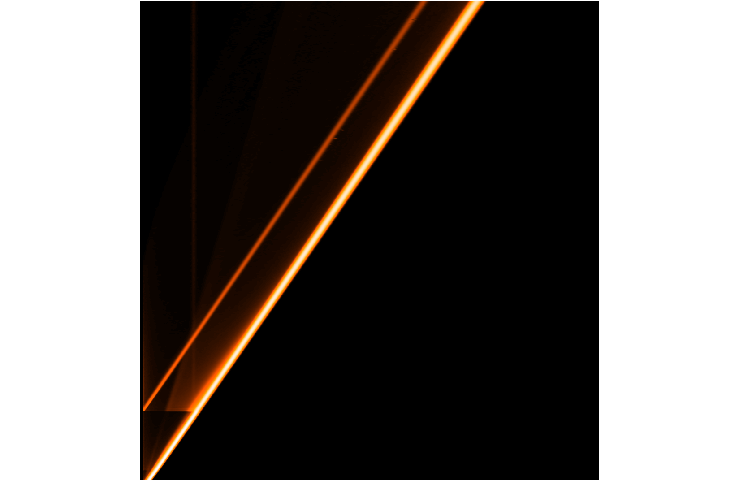

In [143]:
ds9 specextract_01.rmf.img -scale log -zoom to fit -view colorbar no -cmap heat \
  -saveimage png ds9_exercise20.png -quit
display < ds9_exercise20.png 

### Sherpa: Modeling and Fitting

References
- http://cxc.cfa.harvard.edu/sherpa/
- http://cxc.cfa.harvard.edu/sherpa/threads/pha_intro/

sherpa is the fitting and modeling package developed for CIAO.  It allows users to obtain best fit model parameters based on a number of models, fitting methods, and statistics used for uncertainty.

The exercise shown here is an extremely simple sherpa use case.  More advanced usage includes user supplied models, linked model parameters, simultaneously fitting multiple datasets, fitting images, etc.  




#### Exercise 21

In this exercise Students will begin to use sherpa to model and fit the spectrum of the source.

1. Load the ungrouped source spectrum obtained from Exercise 20 step 1 into sherpa
    `sherpa> load_data("source.pha")`
2. Plot the spectrum using the plot_data command
3. Group the data using group_counts(). Select a reasonable number of counts for the dataset.  Replot the data. 
4. Restrict the energy range to a reasonable energy range using the notice() command.  Replot the data.
5. Set the source model to be an absorbed powerlaw using the set_source() command.
    `sherpa> set_source(xswabs.abs1*xspowerlaw.p1)`
6. Set the absorption nH to the value listed in the header of the spectrum file.
7. Use plot_model() to see the model folded through the instrument responses (ARF and RMF).
8. Use show_all() to see all the data and model details.
9. subtract() the background.  Replot the data.
10. fit() the data.  
11. Use plot_fit() to see the data with the model overplotted.
12. Use plot_fit_delchi() to see the data with the error weighted residuals.
13. Use conf() to obtain uncertainties on the fitted parameters.
14. Use set_method() to try different minimization techniques and repeat the fit().
15. Use set_stat() to try different fit statistics and repeat the fit().
16. Try different grouping schemes.
17. Try different spectral models in the set_source() command.
18. Repeat this exercise using the spectrum, ARF and RMF obtain in Exercise 20 steps 2 and 3.



> Q: Which fit method works best?

> Q: Which spectrum fits best?

> Q: Which model/param is best?

> Q: How does grouping affect the results?

> Q: What are the advantages/disadvantages of one method over another? 
